In [547]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style( 'white' )

In [548]:
df = pd.read_csv('cc_train.csv', encoding = 'utf-8')

In [549]:
labels = pd.read_csv('cc_labels.csv', encoding = 'utf-8')

In [550]:
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E193,E194,E195,E196,E197,E198,E199,E200,E201,E202
0,-50000,-50000,-50000,-50000,-50000,-50000,-49912.511,-49821.738,-49704.865,-49580.728,...,-28079.991,-30156.244,-32377.415,-34646.992,-36960.583,-39408.393,-41922.844,-44432.530,-47171.215,-50000.000
1,-50000,-50000,-50000,-50000,-50000,-50000,-49957.676,-49890.199,-49817.034,-49717.997,...,-29698.621,-31716.445,-33915.945,-36022.627,-38191.497,-40519.201,-42786.379,-45144.273,-47561.918,-50000.000
2,-50000,-50000,-50000,-50000,-50000,-50000,-49904.049,-49793.975,-49659.068,-49485.717,...,-26532.558,-28746.874,-31007.080,-33389.389,-35860.816,-38375.481,-41083.210,-43830.689,-46908.492,-50000.000
3,-50000,-50000,-50000,-50000,-50000,-50000,-49945.442,-49841.766,-49709.673,-49578.086,...,-28414.527,-30383.667,-32626.735,-34914.019,-37165.298,-39612.627,-42072.290,-44518.402,-47271.095,-49990.936
4,-50000,-50000,-50000,-50000,-50000,-50000,-49977.269,-49947.285,-49898.247,-49843.781,...,-27236.200,-29637.995,-32101.985,-34596.839,-37104.923,-39670.140,-42211.130,-44785.794,-47423.716,-50000.000


In [551]:
df.columns

Index(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
       ...
       'E193', 'E194', 'E195', 'E196', 'E197', 'E198', 'E199', 'E200', 'E201',
       'E202'],
      dtype='object', length=202)

In [552]:
df.shape

(480, 202)

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Columns: 202 entries, E1 to E202
dtypes: float64(189), int64(13)
memory usage: 757.6 KB


In [554]:
df.describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E193,E194,E195,E196,E197,E198,E199,E200,E201,E202
count,480.0,480.0,480.0,480.0,480.0,480.0,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-49943.913208,-49856.999394,-49749.526267,-49628.683758,...,-25367.027778,-27666.530001,-30033.824361,-32557.192310,-35149.741154,-37845.445471,-40689.625656,-43590.601935,-46765.976665,-49998.810952
std,0.0,0.0,0.0,0.0,0.0,0.0,26.301211,62.954830,108.478520,160.736971,...,8121.201978,7746.546437,7285.673539,6740.460972,6077.936480,5272.834296,4314.728354,3131.924846,1724.533273,3.087395
min,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.000000,-50000.000000,-50000.000000,-50000.000000,...,-30020.954000,-32093.903000,-34165.496000,-36341.960000,-38525.615000,-40768.573000,-43079.472000,-45323.989000,-47719.168000,-50000.000000
25%,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-49959.114000,-49895.320500,-49815.017250,-49724.142250,...,-28683.189500,-30807.688250,-32883.031750,-35246.823000,-37559.539250,-39874.456500,-42356.984750,-44784.612000,-47402.376500,-50000.000000
50%,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-49938.312000,-49835.512500,-49712.310000,-49574.784000,...,-27099.187000,-29254.845500,-31482.607500,-33889.456500,-36302.659000,-38815.835000,-41465.145500,-44101.876000,-47047.921000,-50000.000000
75%,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-49925.355750,-49813.555250,-49671.334750,-49514.909250,...,-26032.098500,-28239.892750,-30498.069250,-32987.986250,-35455.089500,-38080.070250,-40842.429500,-43681.975250,-46841.890500,-50000.000000
max,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-50000.0,-49896.694000,-49755.799000,-49594.491000,-49390.942000,...,22668.114000,19185.973000,15162.065000,10363.927000,4628.967800,-2316.371300,-10761.270000,-21140.759000,-33988.597000,-49988.303000


In [555]:
labels.head()

,sigmac
0,0.483333
1,0.275000
2,0.725000
3,0.466667
4,0.141667


In [556]:
labels.columns

Index(['sigmac'], dtype='object')

In [557]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
import np_utils
from tensorflow.keras.optimizers import Adam, SGD

In [558]:
X = df
y = labels

In [559]:
print(X.shape, y.shape)

(480, 202) (480, 1)


In [560]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

exp = pd.read_csv('exp_validation_cc_10_1.csv', sep=',', engine='python')
X_exp = exp.drop(['sigmac'], 1)
cols = np.r_[:, 0:202]
y_exp = exp.drop(exp.columns[cols],axis=1)

X_exp_train = X_exp.iloc[0:25]
y_exp_train = y_exp.iloc[0:25]

X_exp_valid = X_exp.iloc[26:50]
y_exp_valid = y_exp.iloc[26:50]

X_train = X_train.append(X_exp_train)
y_train = y_train.append(y_exp_train)

X_valid = X_valid.append(X_exp_valid)
y_valid = y_valid.append(y_exp_valid)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [561]:
print(X_train_scaled.shape,X_test_scaled.shape,X_valid_scaled.shape,y_train.shape,y_test.shape,y_valid.shape)

(409, 202) (48, 202) (72, 202) (409, 1) (48, 1) (72, 1)


In [562]:
input_layer = Input(shape=X_train_scaled.shape[1:])
branch = Dense(202, activation='relu')(input_layer)

hidden1 = Dense(250, activation='relu')(branch)
hidden2 = Dense(250, activation='relu')(hidden1)
hidden3 = Dense(250, activation='relu')(hidden2)
hidden4 = Dense(250, activation='relu')(hidden3)
hidden5 = Dense(250, activation='relu')(hidden4)
hidden6 = Dense(250, activation='relu')(hidden5)
batch1 = BatchNormalization()(hidden6)
drop1 = Dropout(0.2)(batch1)
hidden7 = Dense(250, activation='relu')(drop1)
hidden8 = Dense(250, activation='relu')(hidden7)
hidden9 = Dense(250, activation='relu')(hidden8)
hidden10 = Dense(250, activation='relu')(hidden9)
sigmac = Dense(units=1, activation='sigmoid', name='sigmac')(hidden10)

model = Model(inputs=input_layer, outputs=[sigmac])
model.compile(optimizer = SGD(lr = 0.0001),
              loss={'sigmac': 'mse'},
              metrics={'sigmac': 'mae'})

In [563]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 202)]             0         
_________________________________________________________________
dense (Dense)                (None, 202)               41006     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               50750     
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_4 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_5 (Dense)              (None, 250)               62750 

In [564]:
tf.keras.backend.clear_session()

from tensorflow.keras.callbacks import CSVLogger
csv_logger = CSVLogger('cc_training_4_5.log', separator=',', append=False)

model_history = model.fit(X_train_scaled, y_train, callbacks=[csv_logger], epochs=10000 , batch_size = 32 , validation_data=(X_valid_scaled, y_valid))

Epoch 1/10000
13/13 [==============================] - 0s 16ms/step - loss: 0.0784 - mae: 0.2446 - val_loss: 0.0803 - val_mae: 0.2285
Epoch 2/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0771 - mae: 0.2426 - val_loss: 0.0801 - val_mae: 0.2283
Epoch 3/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0764 - mae: 0.2421 - val_loss: 0.0799 - val_mae: 0.2281
Epoch 4/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0771 - mae: 0.2427 - val_loss: 0.0797 - val_mae: 0.2279
Epoch 5/10000
13/13 [==============================] - 0s 9ms/step - loss: 0.0754 - mae: 0.2407 - val_loss: 0.0795 - val_mae: 0.2277
Epoch 6/10000
13/13 [==============================] - 0s 10ms/step - loss: 0.0760 - mae: 0.2414 - val_loss: 0.0792 - val_mae: 0.2274
Epoch 7/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0756 - mae: 0.2408 - val_loss: 0.0789 - val_mae: 0.2270
Epoch 8/10000
13/13 [==============================] - 0s 8ms/step 

13/13 [==============================] - 0s 7ms/step - loss: 0.0609 - mae: 0.2160 - val_loss: 0.0474 - val_mae: 0.1780
Epoch 63/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0610 - mae: 0.2157 - val_loss: 0.0471 - val_mae: 0.1774
Epoch 64/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0604 - mae: 0.2145 - val_loss: 0.0468 - val_mae: 0.1768
Epoch 65/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0610 - mae: 0.2154 - val_loss: 0.0465 - val_mae: 0.1761
Epoch 66/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0609 - mae: 0.2158 - val_loss: 0.0462 - val_mae: 0.1756
Epoch 67/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0588 - mae: 0.2111 - val_loss: 0.0460 - val_mae: 0.1750
Epoch 68/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0602 - mae: 0.2146 - val_loss: 0.0458 - val_mae: 0.1746
Epoch 69/10000
13/13 [==============================] - 0s 5ms/step - loss: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0526 - mae: 0.1988 - val_loss: 0.0372 - val_mae: 0.1551
Epoch 124/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0522 - mae: 0.1984 - val_loss: 0.0371 - val_mae: 0.1548
Epoch 125/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0514 - mae: 0.1965 - val_loss: 0.0370 - val_mae: 0.1544
Epoch 126/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0514 - mae: 0.1972 - val_loss: 0.0369 - val_mae: 0.1542
Epoch 127/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0527 - mae: 0.1990 - val_loss: 0.0367 - val_mae: 0.1538
Epoch 128/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0512 - mae: 0.1965 - val_loss: 0.0366 - val_mae: 0.1536
Epoch 129/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0515 - mae: 0.1966 - val_loss: 0.0366 - val_mae: 0.1534
Epoch 130/10000
13/13 [==============================] - 0s 5ms/step - 

Epoch 184/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0448 - mae: 0.1808 - val_loss: 0.0317 - val_mae: 0.1407
Epoch 185/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0458 - mae: 0.1844 - val_loss: 0.0317 - val_mae: 0.1405
Epoch 186/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0452 - mae: 0.1825 - val_loss: 0.0316 - val_mae: 0.1403
Epoch 187/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0447 - mae: 0.1817 - val_loss: 0.0315 - val_mae: 0.1401
Epoch 188/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0453 - mae: 0.1824 - val_loss: 0.0314 - val_mae: 0.1399
Epoch 189/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0454 - mae: 0.1837 - val_loss: 0.0314 - val_mae: 0.1397
Epoch 190/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0438 - mae: 0.1796 - val_loss: 0.0313 - val_mae: 0.1395
Epoch 191/10000
13/13 [==============================] 

13/13 [==============================] - 0s 5ms/step - loss: 0.0399 - mae: 0.1700 - val_loss: 0.0280 - val_mae: 0.1306
Epoch 245/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0396 - mae: 0.1703 - val_loss: 0.0279 - val_mae: 0.1305
Epoch 246/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0399 - mae: 0.1703 - val_loss: 0.0279 - val_mae: 0.1304
Epoch 247/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0408 - mae: 0.1719 - val_loss: 0.0278 - val_mae: 0.1303
Epoch 248/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0398 - mae: 0.1696 - val_loss: 0.0278 - val_mae: 0.1301
Epoch 249/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0408 - mae: 0.1714 - val_loss: 0.0277 - val_mae: 0.1299
Epoch 250/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0407 - mae: 0.1722 - val_loss: 0.0276 - val_mae: 0.1297
Epoch 251/10000
13/13 [==============================] - 0s 6ms/step - 

Epoch 305/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0362 - mae: 0.1610 - val_loss: 0.0250 - val_mae: 0.1227
Epoch 306/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0362 - mae: 0.1599 - val_loss: 0.0250 - val_mae: 0.1225
Epoch 307/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0358 - mae: 0.1599 - val_loss: 0.0249 - val_mae: 0.1225
Epoch 308/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0354 - mae: 0.1594 - val_loss: 0.0249 - val_mae: 0.1224
Epoch 309/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0350 - mae: 0.1584 - val_loss: 0.0249 - val_mae: 0.1224
Epoch 310/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0359 - mae: 0.1609 - val_loss: 0.0248 - val_mae: 0.1223
Epoch 311/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - mae: 0.1567 - val_loss: 0.0248 - val_mae: 0.1221
Epoch 312/10000
13/13 [==============================] 

13/13 [==============================] - 0s 8ms/step - loss: 0.0316 - mae: 0.1486 - val_loss: 0.0227 - val_mae: 0.1164
Epoch 366/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0312 - mae: 0.1488 - val_loss: 0.0226 - val_mae: 0.1162
Epoch 367/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0335 - mae: 0.1538 - val_loss: 0.0226 - val_mae: 0.1161
Epoch 368/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0313 - mae: 0.1476 - val_loss: 0.0225 - val_mae: 0.1160
Epoch 369/10000
13/13 [==============================] - 0s 9ms/step - loss: 0.0322 - mae: 0.1502 - val_loss: 0.0225 - val_mae: 0.1159
Epoch 370/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0338 - mae: 0.1543 - val_loss: 0.0225 - val_mae: 0.1159
Epoch 371/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0322 - mae: 0.1501 - val_loss: 0.0224 - val_mae: 0.1158
Epoch 372/10000
13/13 [==============================] - 0s 7ms/step - 

Epoch 426/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0280 - mae: 0.1397 - val_loss: 0.0206 - val_mae: 0.1108
Epoch 427/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0294 - mae: 0.1435 - val_loss: 0.0205 - val_mae: 0.1106
Epoch 428/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0284 - mae: 0.1410 - val_loss: 0.0205 - val_mae: 0.1105
Epoch 429/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0297 - mae: 0.1448 - val_loss: 0.0205 - val_mae: 0.1104
Epoch 430/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0284 - mae: 0.1401 - val_loss: 0.0205 - val_mae: 0.1104
Epoch 431/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0297 - mae: 0.1439 - val_loss: 0.0204 - val_mae: 0.1103
Epoch 432/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0292 - mae: 0.1424 - val_loss: 0.0204 - val_mae: 0.1103
Epoch 433/10000
13/13 [==============================] 

13/13 [==============================] - 0s 6ms/step - loss: 0.0254 - mae: 0.1317 - val_loss: 0.0189 - val_mae: 0.1060
Epoch 487/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0267 - mae: 0.1344 - val_loss: 0.0189 - val_mae: 0.1060
Epoch 488/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0256 - mae: 0.1339 - val_loss: 0.0188 - val_mae: 0.1059
Epoch 489/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0269 - mae: 0.1356 - val_loss: 0.0188 - val_mae: 0.1059
Epoch 490/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0258 - mae: 0.1328 - val_loss: 0.0188 - val_mae: 0.1059
Epoch 491/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0270 - mae: 0.1361 - val_loss: 0.0188 - val_mae: 0.1058
Epoch 492/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0264 - mae: 0.1339 - val_loss: 0.0187 - val_mae: 0.1056
Epoch 493/10000
13/13 [==============================] - 0s 6ms/step - 

Epoch 547/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0234 - mae: 0.1262 - val_loss: 0.0174 - val_mae: 0.1020
Epoch 548/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0237 - mae: 0.1259 - val_loss: 0.0174 - val_mae: 0.1020
Epoch 549/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0239 - mae: 0.1267 - val_loss: 0.0173 - val_mae: 0.1019
Epoch 550/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0244 - mae: 0.1283 - val_loss: 0.0173 - val_mae: 0.1019
Epoch 551/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0240 - mae: 0.1291 - val_loss: 0.0173 - val_mae: 0.1019
Epoch 552/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0234 - mae: 0.1263 - val_loss: 0.0173 - val_mae: 0.1018
Epoch 553/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0235 - mae: 0.1258 - val_loss: 0.0172 - val_mae: 0.1017
Epoch 554/10000
13/13 [==============================] 

13/13 [==============================] - 0s 5ms/step - loss: 0.0222 - mae: 0.1218 - val_loss: 0.0160 - val_mae: 0.0985
Epoch 608/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0214 - mae: 0.1179 - val_loss: 0.0160 - val_mae: 0.0985
Epoch 609/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0224 - mae: 0.1233 - val_loss: 0.0160 - val_mae: 0.0985
Epoch 610/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0218 - mae: 0.1206 - val_loss: 0.0160 - val_mae: 0.0984
Epoch 611/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0213 - mae: 0.1186 - val_loss: 0.0160 - val_mae: 0.0984
Epoch 612/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0207 - mae: 0.1168 - val_loss: 0.0160 - val_mae: 0.0984
Epoch 613/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0214 - mae: 0.1191 - val_loss: 0.0160 - val_mae: 0.0983
Epoch 614/10000
13/13 [==============================] - 0s 5ms/step - 

Epoch 668/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0205 - mae: 0.1161 - val_loss: 0.0149 - val_mae: 0.0953
Epoch 669/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0197 - mae: 0.1140 - val_loss: 0.0149 - val_mae: 0.0954
Epoch 670/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0194 - mae: 0.1141 - val_loss: 0.0149 - val_mae: 0.0953
Epoch 671/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0204 - mae: 0.1159 - val_loss: 0.0148 - val_mae: 0.0953
Epoch 672/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0201 - mae: 0.1154 - val_loss: 0.0148 - val_mae: 0.0952
Epoch 673/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0198 - mae: 0.1153 - val_loss: 0.0148 - val_mae: 0.0952
Epoch 674/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0207 - mae: 0.1181 - val_loss: 0.0148 - val_mae: 0.0952
Epoch 675/10000
13/13 [==============================] 

13/13 [==============================] - 0s 5ms/step - loss: 0.0187 - mae: 0.1100 - val_loss: 0.0139 - val_mae: 0.0930
Epoch 729/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0189 - mae: 0.1111 - val_loss: 0.0139 - val_mae: 0.0931
Epoch 730/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0185 - mae: 0.1106 - val_loss: 0.0139 - val_mae: 0.0931
Epoch 731/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0176 - mae: 0.1073 - val_loss: 0.0139 - val_mae: 0.0930
Epoch 732/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0178 - mae: 0.1087 - val_loss: 0.0139 - val_mae: 0.0930
Epoch 733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0182 - mae: 0.1091 - val_loss: 0.0139 - val_mae: 0.0929
Epoch 734/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0180 - mae: 0.1083 - val_loss: 0.0138 - val_mae: 0.0929
Epoch 735/10000
13/13 [==============================] - 0s 5ms/step - 

Epoch 789/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0171 - mae: 0.1054 - val_loss: 0.0130 - val_mae: 0.0905
Epoch 790/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0171 - mae: 0.1051 - val_loss: 0.0130 - val_mae: 0.0903
Epoch 791/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0159 - mae: 0.1012 - val_loss: 0.0130 - val_mae: 0.0904
Epoch 792/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0165 - mae: 0.1034 - val_loss: 0.0130 - val_mae: 0.0904
Epoch 793/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0167 - mae: 0.1045 - val_loss: 0.0129 - val_mae: 0.0903
Epoch 794/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0181 - mae: 0.1072 - val_loss: 0.0129 - val_mae: 0.0902
Epoch 795/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0167 - mae: 0.1039 - val_loss: 0.0129 - val_mae: 0.0902
Epoch 796/10000
13/13 [==============================] 

13/13 [==============================] - 0s 5ms/step - loss: 0.0147 - mae: 0.0973 - val_loss: 0.0121 - val_mae: 0.0877
Epoch 850/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0160 - mae: 0.1014 - val_loss: 0.0121 - val_mae: 0.0876
Epoch 851/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0154 - mae: 0.0982 - val_loss: 0.0121 - val_mae: 0.0876
Epoch 852/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0153 - mae: 0.0982 - val_loss: 0.0121 - val_mae: 0.0876
Epoch 853/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0154 - mae: 0.0987 - val_loss: 0.0121 - val_mae: 0.0876
Epoch 854/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0149 - mae: 0.0968 - val_loss: 0.0121 - val_mae: 0.0875
Epoch 855/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0159 - mae: 0.0994 - val_loss: 0.0120 - val_mae: 0.0873
Epoch 856/10000
13/13 [==============================] - 0s 5ms/step - 

Epoch 910/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0138 - mae: 0.0946 - val_loss: 0.0113 - val_mae: 0.0847
Epoch 911/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0147 - mae: 0.0944 - val_loss: 0.0113 - val_mae: 0.0848
Epoch 912/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0141 - mae: 0.0952 - val_loss: 0.0113 - val_mae: 0.0847
Epoch 913/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0131 - mae: 0.0903 - val_loss: 0.0113 - val_mae: 0.0846
Epoch 914/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0146 - mae: 0.0963 - val_loss: 0.0113 - val_mae: 0.0847
Epoch 915/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0138 - mae: 0.0931 - val_loss: 0.0113 - val_mae: 0.0847
Epoch 916/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0134 - mae: 0.0909 - val_loss: 0.0113 - val_mae: 0.0846
Epoch 917/10000
13/13 [==============================] 

13/13 [==============================] - 0s 5ms/step - loss: 0.0131 - mae: 0.0904 - val_loss: 0.0107 - val_mae: 0.0825
Epoch 971/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0128 - mae: 0.0882 - val_loss: 0.0107 - val_mae: 0.0826
Epoch 972/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0135 - mae: 0.0910 - val_loss: 0.0107 - val_mae: 0.0825
Epoch 973/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0145 - mae: 0.0929 - val_loss: 0.0107 - val_mae: 0.0824
Epoch 974/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0131 - mae: 0.0899 - val_loss: 0.0107 - val_mae: 0.0824
Epoch 975/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0126 - mae: 0.0880 - val_loss: 0.0107 - val_mae: 0.0823
Epoch 976/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0122 - mae: 0.0871 - val_loss: 0.0107 - val_mae: 0.0823
Epoch 977/10000
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 5ms/step - loss: 0.0123 - mae: 0.0865 - val_loss: 0.0101 - val_mae: 0.0801
Epoch 1031/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0135 - mae: 0.0918 - val_loss: 0.0101 - val_mae: 0.0800
Epoch 1032/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0125 - mae: 0.0869 - val_loss: 0.0101 - val_mae: 0.0800
Epoch 1033/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0116 - mae: 0.0839 - val_loss: 0.0101 - val_mae: 0.0800
Epoch 1034/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0119 - mae: 0.0855 - val_loss: 0.0101 - val_mae: 0.0799
Epoch 1035/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0123 - mae: 0.0870 - val_loss: 0.0101 - val_mae: 0.0798
Epoch 1036/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0130 - mae: 0.0895 - val_loss: 0.0101 - val_mae: 0.0798
Epoch 1037/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0111 - mae: 0.0817 - val_loss: 0.0096 - val_mae: 0.0778
Epoch 1091/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0115 - mae: 0.0841 - val_loss: 0.0096 - val_mae: 0.0777
Epoch 1092/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0108 - mae: 0.0821 - val_loss: 0.0096 - val_mae: 0.0778
Epoch 1093/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0119 - mae: 0.0836 - val_loss: 0.0096 - val_mae: 0.0777
Epoch 1094/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0127 - mae: 0.0894 - val_loss: 0.0096 - val_mae: 0.0778
Epoch 1095/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0112 - mae: 0.0835 - val_loss: 0.0096 - val_mae: 0.0778
Epoch 1096/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0102 - mae: 0.0786 - val_loss: 0.0095 - val_mae: 0.0777
Epoch 1097/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0105 - mae: 0.0789 - val_loss: 0.0091 - val_mae: 0.0759
Epoch 1151/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0112 - mae: 0.0826 - val_loss: 0.0091 - val_mae: 0.0759
Epoch 1152/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0095 - mae: 0.0758 - val_loss: 0.0091 - val_mae: 0.0758
Epoch 1153/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0115 - mae: 0.0841 - val_loss: 0.0091 - val_mae: 0.0758
Epoch 1154/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0106 - mae: 0.0806 - val_loss: 0.0091 - val_mae: 0.0757
Epoch 1155/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0107 - mae: 0.0806 - val_loss: 0.0091 - val_mae: 0.0756
Epoch 1156/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0112 - mae: 0.0814 - val_loss: 0.0091 - val_mae: 0.0755
Epoch 1157/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0100 - mae: 0.0775 - val_loss: 0.0087 - val_mae: 0.0739
Epoch 1211/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0101 - mae: 0.0797 - val_loss: 0.0087 - val_mae: 0.0739
Epoch 1212/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0109 - mae: 0.0806 - val_loss: 0.0087 - val_mae: 0.0739
Epoch 1213/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0095 - mae: 0.0741 - val_loss: 0.0087 - val_mae: 0.0739
Epoch 1214/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0099 - mae: 0.0768 - val_loss: 0.0087 - val_mae: 0.0738
Epoch 1215/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0094 - mae: 0.0751 - val_loss: 0.0086 - val_mae: 0.0736
Epoch 1216/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0105 - mae: 0.0786 - val_loss: 0.0086 - val_mae: 0.0737
Epoch 1217/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0098 - mae: 0.0754 - val_loss: 0.0083 - val_mae: 0.0719
Epoch 1271/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0093 - mae: 0.0738 - val_loss: 0.0083 - val_mae: 0.0719
Epoch 1272/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0104 - mae: 0.0786 - val_loss: 0.0083 - val_mae: 0.0717
Epoch 1273/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0093 - mae: 0.0740 - val_loss: 0.0083 - val_mae: 0.0717
Epoch 1274/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0768 - val_loss: 0.0083 - val_mae: 0.0718
Epoch 1275/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0730 - val_loss: 0.0083 - val_mae: 0.0719
Epoch 1276/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0737 - val_loss: 0.0083 - val_mae: 0.0718
Epoch 1277/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0107 - mae: 0.0812 - val_loss: 0.0079 - val_mae: 0.0701
Epoch 1331/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0736 - val_loss: 0.0079 - val_mae: 0.0701
Epoch 1332/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0088 - mae: 0.0727 - val_loss: 0.0079 - val_mae: 0.0699
Epoch 1333/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0101 - mae: 0.0761 - val_loss: 0.0079 - val_mae: 0.0698
Epoch 1334/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0714 - val_loss: 0.0079 - val_mae: 0.0698
Epoch 1335/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0722 - val_loss: 0.0079 - val_mae: 0.0697
Epoch 1336/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0091 - mae: 0.0730 - val_loss: 0.0079 - val_mae: 0.0698
Epoch 1337/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0734 - val_loss: 0.0076 - val_mae: 0.0679
Epoch 1391/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0704 - val_loss: 0.0076 - val_mae: 0.0678
Epoch 1392/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0092 - mae: 0.0727 - val_loss: 0.0075 - val_mae: 0.0677
Epoch 1393/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0697 - val_loss: 0.0075 - val_mae: 0.0676
Epoch 1394/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0721 - val_loss: 0.0075 - val_mae: 0.0677
Epoch 1395/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0085 - mae: 0.0709 - val_loss: 0.0075 - val_mae: 0.0677
Epoch 1396/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0702 - val_loss: 0.0075 - val_mae: 0.0677
Epoch 1397/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0707 - val_loss: 0.0073 - val_mae: 0.0661
Epoch 1451/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0679 - val_loss: 0.0073 - val_mae: 0.0663
Epoch 1452/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0653 - val_loss: 0.0073 - val_mae: 0.0662
Epoch 1453/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0774 - val_loss: 0.0073 - val_mae: 0.0662
Epoch 1454/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0640 - val_loss: 0.0073 - val_mae: 0.0663
Epoch 1455/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0720 - val_loss: 0.0073 - val_mae: 0.0662
Epoch 1456/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0073 - mae: 0.0641 - val_loss: 0.0073 - val_mae: 0.0662
Epoch 1457/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0674 - val_loss: 0.0070 - val_mae: 0.0644
Epoch 1511/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0070 - mae: 0.0609 - val_loss: 0.0070 - val_mae: 0.0644
Epoch 1512/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0070 - mae: 0.0625 - val_loss: 0.0070 - val_mae: 0.0645
Epoch 1513/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0682 - val_loss: 0.0070 - val_mae: 0.0645
Epoch 1514/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0712 - val_loss: 0.0070 - val_mae: 0.0644
Epoch 1515/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0093 - mae: 0.0740 - val_loss: 0.0070 - val_mae: 0.0643
Epoch 1516/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0073 - mae: 0.0643 - val_loss: 0.0070 - val_mae: 0.0642
Epoch 1517/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0075 - mae: 0.0654 - val_loss: 0.0068 - val_mae: 0.0631
Epoch 1571/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0701 - val_loss: 0.0068 - val_mae: 0.0631
Epoch 1572/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0703 - val_loss: 0.0068 - val_mae: 0.0631
Epoch 1573/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0080 - mae: 0.0691 - val_loss: 0.0068 - val_mae: 0.0631
Epoch 1574/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0071 - mae: 0.0628 - val_loss: 0.0068 - val_mae: 0.0630
Epoch 1575/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0080 - mae: 0.0671 - val_loss: 0.0068 - val_mae: 0.0630
Epoch 1576/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0672 - val_loss: 0.0068 - val_mae: 0.0630
Epoch 1577/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0068 - mae: 0.0603 - val_loss: 0.0065 - val_mae: 0.0612
Epoch 1631/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0064 - mae: 0.0603 - val_loss: 0.0065 - val_mae: 0.0612
Epoch 1632/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0634 - val_loss: 0.0065 - val_mae: 0.0610
Epoch 1633/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0648 - val_loss: 0.0065 - val_mae: 0.0610
Epoch 1634/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0078 - mae: 0.0681 - val_loss: 0.0065 - val_mae: 0.0609
Epoch 1635/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0070 - mae: 0.0634 - val_loss: 0.0065 - val_mae: 0.0608
Epoch 1636/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0066 - mae: 0.0607 - val_loss: 0.0065 - val_mae: 0.0609
Epoch 1637/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0634 - val_loss: 0.0063 - val_mae: 0.0598
Epoch 1691/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0671 - val_loss: 0.0063 - val_mae: 0.0598
Epoch 1692/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0084 - mae: 0.0690 - val_loss: 0.0063 - val_mae: 0.0598
Epoch 1693/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0074 - mae: 0.0633 - val_loss: 0.0063 - val_mae: 0.0597
Epoch 1694/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0067 - mae: 0.0604 - val_loss: 0.0063 - val_mae: 0.0597
Epoch 1695/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0701 - val_loss: 0.0063 - val_mae: 0.0595
Epoch 1696/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0068 - mae: 0.0610 - val_loss: 0.0063 - val_mae: 0.0595
Epoch 1697/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0633 - val_loss: 0.0061 - val_mae: 0.0583
Epoch 1751/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0065 - mae: 0.0603 - val_loss: 0.0061 - val_mae: 0.0582
Epoch 1752/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0074 - mae: 0.0652 - val_loss: 0.0061 - val_mae: 0.0581
Epoch 1753/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0060 - mae: 0.0582 - val_loss: 0.0061 - val_mae: 0.0580
Epoch 1754/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0069 - mae: 0.0616 - val_loss: 0.0061 - val_mae: 0.0580
Epoch 1755/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0085 - mae: 0.0712 - val_loss: 0.0061 - val_mae: 0.0580
Epoch 1756/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0070 - mae: 0.0619 - val_loss: 0.0061 - val_mae: 0.0580
Epoch 1757/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0059 - mae: 0.0574 - val_loss: 0.0059 - val_mae: 0.0570
Epoch 1811/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0062 - mae: 0.0585 - val_loss: 0.0059 - val_mae: 0.0570
Epoch 1812/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0057 - mae: 0.0554 - val_loss: 0.0059 - val_mae: 0.0570
Epoch 1813/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0066 - mae: 0.0609 - val_loss: 0.0059 - val_mae: 0.0569
Epoch 1814/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0066 - mae: 0.0609 - val_loss: 0.0059 - val_mae: 0.0568
Epoch 1815/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0073 - mae: 0.0644 - val_loss: 0.0059 - val_mae: 0.0568
Epoch 1816/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0067 - mae: 0.0635 - val_loss: 0.0059 - val_mae: 0.0569
Epoch 1817/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0066 - mae: 0.0587 - val_loss: 0.0057 - val_mae: 0.0551
Epoch 1871/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0062 - mae: 0.0598 - val_loss: 0.0057 - val_mae: 0.0552
Epoch 1872/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0061 - mae: 0.0581 - val_loss: 0.0057 - val_mae: 0.0552
Epoch 1873/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0070 - mae: 0.0616 - val_loss: 0.0057 - val_mae: 0.0551
Epoch 1874/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0066 - mae: 0.0608 - val_loss: 0.0057 - val_mae: 0.0552
Epoch 1875/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0064 - mae: 0.0598 - val_loss: 0.0057 - val_mae: 0.0553
Epoch 1876/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0053 - mae: 0.0524 - val_loss: 0.0057 - val_mae: 0.0553
Epoch 1877/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0082 - mae: 0.0679 - val_loss: 0.0056 - val_mae: 0.0541
Epoch 1931/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0054 - mae: 0.0542 - val_loss: 0.0056 - val_mae: 0.0542
Epoch 1932/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0064 - mae: 0.0598 - val_loss: 0.0056 - val_mae: 0.0541
Epoch 1933/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0060 - mae: 0.0590 - val_loss: 0.0055 - val_mae: 0.0540
Epoch 1934/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0061 - mae: 0.0573 - val_loss: 0.0055 - val_mae: 0.0539
Epoch 1935/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0063 - mae: 0.0609 - val_loss: 0.0055 - val_mae: 0.0540
Epoch 1936/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0058 - mae: 0.0559 - val_loss: 0.0055 - val_mae: 0.0539
Epoch 1937/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0058 - mae: 0.0553 - val_loss: 0.0054 - val_mae: 0.0529
Epoch 1991/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0057 - mae: 0.0553 - val_loss: 0.0054 - val_mae: 0.0529
Epoch 1992/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0054 - mae: 0.0538 - val_loss: 0.0054 - val_mae: 0.0529
Epoch 1993/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0065 - mae: 0.0607 - val_loss: 0.0054 - val_mae: 0.0527
Epoch 1994/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0060 - mae: 0.0571 - val_loss: 0.0054 - val_mae: 0.0526
Epoch 1995/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0066 - mae: 0.0608 - val_loss: 0.0054 - val_mae: 0.0527
Epoch 1996/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0058 - mae: 0.0571 - val_loss: 0.0054 - val_mae: 0.0526
Epoch 1997/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0057 - mae: 0.0578 - val_loss: 0.0052 - val_mae: 0.0513
Epoch 2051/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0063 - mae: 0.0586 - val_loss: 0.0052 - val_mae: 0.0513
Epoch 2052/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0056 - mae: 0.0567 - val_loss: 0.0052 - val_mae: 0.0512
Epoch 2053/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0051 - mae: 0.0541 - val_loss: 0.0052 - val_mae: 0.0512
Epoch 2054/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0059 - mae: 0.0588 - val_loss: 0.0052 - val_mae: 0.0512
Epoch 2055/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0058 - mae: 0.0559 - val_loss: 0.0052 - val_mae: 0.0513
Epoch 2056/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0054 - mae: 0.0539 - val_loss: 0.0052 - val_mae: 0.0514
Epoch 2057/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0521 - val_loss: 0.0051 - val_mae: 0.0501
Epoch 2111/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0054 - mae: 0.0536 - val_loss: 0.0051 - val_mae: 0.0500
Epoch 2112/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0063 - mae: 0.0577 - val_loss: 0.0051 - val_mae: 0.0500
Epoch 2113/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0061 - mae: 0.0580 - val_loss: 0.0051 - val_mae: 0.0500
Epoch 2114/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0057 - mae: 0.0580 - val_loss: 0.0051 - val_mae: 0.0499
Epoch 2115/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0050 - mae: 0.0525 - val_loss: 0.0051 - val_mae: 0.0499
Epoch 2116/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0063 - mae: 0.0608 - val_loss: 0.0051 - val_mae: 0.0500
Epoch 2117/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0060 - mae: 0.0577 - val_loss: 0.0050 - val_mae: 0.0490
Epoch 2171/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0052 - mae: 0.0549 - val_loss: 0.0050 - val_mae: 0.0491
Epoch 2172/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0057 - mae: 0.0584 - val_loss: 0.0050 - val_mae: 0.0490
Epoch 2173/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0521 - val_loss: 0.0049 - val_mae: 0.0490
Epoch 2174/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0067 - mae: 0.0609 - val_loss: 0.0049 - val_mae: 0.0490
Epoch 2175/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0056 - mae: 0.0565 - val_loss: 0.0049 - val_mae: 0.0489
Epoch 2176/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0052 - mae: 0.0533 - val_loss: 0.0049 - val_mae: 0.0489
Epoch 2177/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0055 - mae: 0.0551 - val_loss: 0.0048 - val_mae: 0.0477
Epoch 2231/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0067 - mae: 0.0609 - val_loss: 0.0048 - val_mae: 0.0476
Epoch 2232/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0058 - mae: 0.0563 - val_loss: 0.0048 - val_mae: 0.0475
Epoch 2233/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0054 - mae: 0.0557 - val_loss: 0.0048 - val_mae: 0.0476
Epoch 2234/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0052 - mae: 0.0544 - val_loss: 0.0048 - val_mae: 0.0476
Epoch 2235/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0046 - mae: 0.0511 - val_loss: 0.0048 - val_mae: 0.0476
Epoch 2236/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0495 - val_loss: 0.0048 - val_mae: 0.0475
Epoch 2237/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0054 - mae: 0.0554 - val_loss: 0.0047 - val_mae: 0.0464
Epoch 2291/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0055 - mae: 0.0555 - val_loss: 0.0047 - val_mae: 0.0464
Epoch 2292/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0060 - mae: 0.0567 - val_loss: 0.0047 - val_mae: 0.0464
Epoch 2293/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0533 - val_loss: 0.0047 - val_mae: 0.0464
Epoch 2294/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0066 - mae: 0.0609 - val_loss: 0.0047 - val_mae: 0.0463
Epoch 2295/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0053 - mae: 0.0535 - val_loss: 0.0047 - val_mae: 0.0464
Epoch 2296/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0517 - val_loss: 0.0047 - val_mae: 0.0464
Epoch 2297/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0052 - mae: 0.0536 - val_loss: 0.0046 - val_mae: 0.0457
Epoch 2351/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0057 - mae: 0.0573 - val_loss: 0.0046 - val_mae: 0.0456
Epoch 2352/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mae: 0.0519 - val_loss: 0.0046 - val_mae: 0.0456
Epoch 2353/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0064 - mae: 0.0607 - val_loss: 0.0046 - val_mae: 0.0456
Epoch 2354/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0050 - mae: 0.0503 - val_loss: 0.0046 - val_mae: 0.0456
Epoch 2355/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0055 - mae: 0.0554 - val_loss: 0.0045 - val_mae: 0.0455
Epoch 2356/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0065 - mae: 0.0610 - val_loss: 0.0046 - val_mae: 0.0455
Epoch 2357/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0058 - mae: 0.0578 - val_loss: 0.0044 - val_mae: 0.0446
Epoch 2411/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0501 - val_loss: 0.0044 - val_mae: 0.0447
Epoch 2412/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0050 - mae: 0.0530 - val_loss: 0.0044 - val_mae: 0.0446
Epoch 2413/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0052 - mae: 0.0523 - val_loss: 0.0044 - val_mae: 0.0446
Epoch 2414/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0517 - val_loss: 0.0044 - val_mae: 0.0446
Epoch 2415/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0058 - mae: 0.0580 - val_loss: 0.0044 - val_mae: 0.0444
Epoch 2416/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0042 - mae: 0.0480 - val_loss: 0.0044 - val_mae: 0.0444
Epoch 2417/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0053 - mae: 0.0551 - val_loss: 0.0043 - val_mae: 0.0436
Epoch 2471/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mae: 0.0535 - val_loss: 0.0043 - val_mae: 0.0435
Epoch 2472/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0057 - mae: 0.0564 - val_loss: 0.0043 - val_mae: 0.0435
Epoch 2473/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mae: 0.0522 - val_loss: 0.0043 - val_mae: 0.0435
Epoch 2474/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0056 - mae: 0.0579 - val_loss: 0.0043 - val_mae: 0.0435
Epoch 2475/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0055 - mae: 0.0565 - val_loss: 0.0043 - val_mae: 0.0434
Epoch 2476/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0054 - mae: 0.0552 - val_loss: 0.0043 - val_mae: 0.0433
Epoch 2477/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0498 - val_loss: 0.0042 - val_mae: 0.0428
Epoch 2531/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0499 - val_loss: 0.0042 - val_mae: 0.0427
Epoch 2532/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0050 - mae: 0.0527 - val_loss: 0.0042 - val_mae: 0.0428
Epoch 2533/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0052 - mae: 0.0530 - val_loss: 0.0042 - val_mae: 0.0428
Epoch 2534/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0513 - val_loss: 0.0042 - val_mae: 0.0427
Epoch 2535/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0044 - mae: 0.0504 - val_loss: 0.0042 - val_mae: 0.0428
Epoch 2536/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0053 - mae: 0.0555 - val_loss: 0.0042 - val_mae: 0.0427
Epoch 2537/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0049 - mae: 0.0529 - val_loss: 0.0041 - val_mae: 0.0420
Epoch 2591/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0553 - val_loss: 0.0041 - val_mae: 0.0420
Epoch 2592/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0043 - mae: 0.0486 - val_loss: 0.0041 - val_mae: 0.0420
Epoch 2593/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0055 - mae: 0.0568 - val_loss: 0.0041 - val_mae: 0.0420
Epoch 2594/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0045 - mae: 0.0491 - val_loss: 0.0041 - val_mae: 0.0420
Epoch 2595/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0459 - val_loss: 0.0041 - val_mae: 0.0420
Epoch 2596/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0051 - mae: 0.0550 - val_loss: 0.0041 - val_mae: 0.0421
Epoch 2597/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0478 - val_loss: 0.0040 - val_mae: 0.0414
Epoch 2651/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0508 - val_loss: 0.0040 - val_mae: 0.0413
Epoch 2652/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0518 - val_loss: 0.0040 - val_mae: 0.0413
Epoch 2653/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0460 - val_loss: 0.0040 - val_mae: 0.0414
Epoch 2654/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0502 - val_loss: 0.0040 - val_mae: 0.0413
Epoch 2655/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0528 - val_loss: 0.0040 - val_mae: 0.0413
Epoch 2656/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0510 - val_loss: 0.0040 - val_mae: 0.0414
Epoch 2657/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0529 - val_loss: 0.0039 - val_mae: 0.0409
Epoch 2711/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0516 - val_loss: 0.0039 - val_mae: 0.0411
Epoch 2712/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0043 - mae: 0.0484 - val_loss: 0.0039 - val_mae: 0.0409
Epoch 2713/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0051 - mae: 0.0536 - val_loss: 0.0039 - val_mae: 0.0409
Epoch 2714/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0489 - val_loss: 0.0039 - val_mae: 0.0409
Epoch 2715/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0508 - val_loss: 0.0039 - val_mae: 0.0409
Epoch 2716/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0513 - val_loss: 0.0039 - val_mae: 0.0408
Epoch 2717/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0060 - mae: 0.0582 - val_loss: 0.0038 - val_mae: 0.0403
Epoch 2771/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0505 - val_loss: 0.0038 - val_mae: 0.0403
Epoch 2772/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0476 - val_loss: 0.0038 - val_mae: 0.0403
Epoch 2773/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0487 - val_loss: 0.0038 - val_mae: 0.0402
Epoch 2774/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0051 - mae: 0.0529 - val_loss: 0.0038 - val_mae: 0.0403
Epoch 2775/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0457 - val_loss: 0.0038 - val_mae: 0.0402
Epoch 2776/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0037 - mae: 0.0462 - val_loss: 0.0038 - val_mae: 0.0403
Epoch 2777/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 9ms/step - loss: 0.0047 - mae: 0.0497 - val_loss: 0.0037 - val_mae: 0.0399
Epoch 2831/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0047 - mae: 0.0505 - val_loss: 0.0038 - val_mae: 0.0400
Epoch 2832/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0489 - val_loss: 0.0038 - val_mae: 0.0400
Epoch 2833/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0062 - mae: 0.0602 - val_loss: 0.0038 - val_mae: 0.0400
Epoch 2834/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0475 - val_loss: 0.0038 - val_mae: 0.0400
Epoch 2835/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0045 - mae: 0.0503 - val_loss: 0.0038 - val_mae: 0.0400
Epoch 2836/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0474 - val_loss: 0.0037 - val_mae: 0.0399
Epoch 2837/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0487 - val_loss: 0.0037 - val_mae: 0.0395
Epoch 2891/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0474 - val_loss: 0.0037 - val_mae: 0.0395
Epoch 2892/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0044 - mae: 0.0500 - val_loss: 0.0037 - val_mae: 0.0395
Epoch 2893/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0045 - mae: 0.0497 - val_loss: 0.0037 - val_mae: 0.0395
Epoch 2894/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0056 - mae: 0.0565 - val_loss: 0.0037 - val_mae: 0.0395
Epoch 2895/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0462 - val_loss: 0.0037 - val_mae: 0.0395
Epoch 2896/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0484 - val_loss: 0.0037 - val_mae: 0.0395
Epoch 2897/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0044 - mae: 0.0514 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 2951/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0480 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 2952/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0469 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 2953/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0047 - mae: 0.0512 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 2954/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0047 - mae: 0.0511 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 2955/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0049 - mae: 0.0511 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 2956/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0503 - val_loss: 0.0036 - val_mae: 0.0391
Epoch 2957/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0483 - val_loss: 0.0035 - val_mae: 0.0389
Epoch 3011/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0046 - mae: 0.0508 - val_loss: 0.0035 - val_mae: 0.0388
Epoch 3012/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0496 - val_loss: 0.0035 - val_mae: 0.0389
Epoch 3013/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0463 - val_loss: 0.0035 - val_mae: 0.0388
Epoch 3014/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0473 - val_loss: 0.0035 - val_mae: 0.0388
Epoch 3015/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0464 - val_loss: 0.0035 - val_mae: 0.0388
Epoch 3016/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0038 - mae: 0.0459 - val_loss: 0.0035 - val_mae: 0.0388
Epoch 3017/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0045 - mae: 0.0489 - val_loss: 0.0035 - val_mae: 0.0386
Epoch 3071/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0046 - mae: 0.0505 - val_loss: 0.0035 - val_mae: 0.0385
Epoch 3072/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0474 - val_loss: 0.0035 - val_mae: 0.0385
Epoch 3073/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0038 - mae: 0.0469 - val_loss: 0.0035 - val_mae: 0.0385
Epoch 3074/10000
13/13 [==============================] - 0s 9ms/step - loss: 0.0044 - mae: 0.0494 - val_loss: 0.0035 - val_mae: 0.0385
Epoch 3075/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0045 - mae: 0.0499 - val_loss: 0.0034 - val_mae: 0.0384
Epoch 3076/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0471 - val_loss: 0.0034 - val_mae: 0.0384
Epoch 3077/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0468 - val_loss: 0.0034 - val_mae: 0.0382
Epoch 3131/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0039 - mae: 0.0467 - val_loss: 0.0034 - val_mae: 0.0382
Epoch 3132/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0479 - val_loss: 0.0034 - val_mae: 0.0382
Epoch 3133/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0467 - val_loss: 0.0034 - val_mae: 0.0382
Epoch 3134/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0032 - mae: 0.0429 - val_loss: 0.0034 - val_mae: 0.0382
Epoch 3135/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0453 - val_loss: 0.0034 - val_mae: 0.0382
Epoch 3136/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0486 - val_loss: 0.0034 - val_mae: 0.0381
Epoch 3137/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0445 - val_loss: 0.0033 - val_mae: 0.0379
Epoch 3191/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0423 - val_loss: 0.0033 - val_mae: 0.0379
Epoch 3192/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0493 - val_loss: 0.0033 - val_mae: 0.0379
Epoch 3193/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0499 - val_loss: 0.0033 - val_mae: 0.0379
Epoch 3194/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0476 - val_loss: 0.0033 - val_mae: 0.0379
Epoch 3195/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0059 - mae: 0.0579 - val_loss: 0.0033 - val_mae: 0.0379
Epoch 3196/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0471 - val_loss: 0.0033 - val_mae: 0.0379
Epoch 3197/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0460 - val_loss: 0.0033 - val_mae: 0.0376
Epoch 3251/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0038 - mae: 0.0459 - val_loss: 0.0033 - val_mae: 0.0376
Epoch 3252/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0468 - val_loss: 0.0033 - val_mae: 0.0376
Epoch 3253/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0038 - mae: 0.0469 - val_loss: 0.0033 - val_mae: 0.0376
Epoch 3254/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0040 - mae: 0.0468 - val_loss: 0.0033 - val_mae: 0.0376
Epoch 3255/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0464 - val_loss: 0.0033 - val_mae: 0.0376
Epoch 3256/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0499 - val_loss: 0.0033 - val_mae: 0.0375
Epoch 3257/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0044 - mae: 0.0487 - val_loss: 0.0032 - val_mae: 0.0372
Epoch 3311/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0522 - val_loss: 0.0032 - val_mae: 0.0373
Epoch 3312/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0038 - mae: 0.0477 - val_loss: 0.0032 - val_mae: 0.0372
Epoch 3313/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0459 - val_loss: 0.0032 - val_mae: 0.0372
Epoch 3314/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0045 - mae: 0.0501 - val_loss: 0.0032 - val_mae: 0.0371
Epoch 3315/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0051 - mae: 0.0527 - val_loss: 0.0032 - val_mae: 0.0372
Epoch 3316/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0034 - mae: 0.0441 - val_loss: 0.0032 - val_mae: 0.0372
Epoch 3317/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mae: 0.0541 - val_loss: 0.0032 - val_mae: 0.0369
Epoch 3371/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0471 - val_loss: 0.0032 - val_mae: 0.0369
Epoch 3372/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0497 - val_loss: 0.0031 - val_mae: 0.0369
Epoch 3373/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0468 - val_loss: 0.0032 - val_mae: 0.0369
Epoch 3374/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0039 - mae: 0.0480 - val_loss: 0.0032 - val_mae: 0.0369
Epoch 3375/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0038 - mae: 0.0461 - val_loss: 0.0032 - val_mae: 0.0369
Epoch 3376/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0482 - val_loss: 0.0031 - val_mae: 0.0369
Epoch 3377/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0050 - mae: 0.0554 - val_loss: 0.0031 - val_mae: 0.0366
Epoch 3431/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0437 - val_loss: 0.0031 - val_mae: 0.0366
Epoch 3432/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0037 - mae: 0.0450 - val_loss: 0.0031 - val_mae: 0.0366
Epoch 3433/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0466 - val_loss: 0.0031 - val_mae: 0.0366
Epoch 3434/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0040 - mae: 0.0465 - val_loss: 0.0031 - val_mae: 0.0365
Epoch 3435/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0474 - val_loss: 0.0031 - val_mae: 0.0365
Epoch 3436/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0032 - mae: 0.0422 - val_loss: 0.0031 - val_mae: 0.0365
Epoch 3437/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0466 - val_loss: 0.0030 - val_mae: 0.0362
Epoch 3491/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0479 - val_loss: 0.0030 - val_mae: 0.0362
Epoch 3492/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0430 - val_loss: 0.0030 - val_mae: 0.0361
Epoch 3493/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0455 - val_loss: 0.0030 - val_mae: 0.0361
Epoch 3494/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0039 - mae: 0.0463 - val_loss: 0.0030 - val_mae: 0.0362
Epoch 3495/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0045 - mae: 0.0503 - val_loss: 0.0030 - val_mae: 0.0362
Epoch 3496/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0036 - mae: 0.0445 - val_loss: 0.0030 - val_mae: 0.0362
Epoch 3497/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 5ms/step - loss: 0.0037 - mae: 0.0446 - val_loss: 0.0030 - val_mae: 0.0360
Epoch 3551/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0452 - val_loss: 0.0030 - val_mae: 0.0360
Epoch 3552/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0427 - val_loss: 0.0030 - val_mae: 0.0360
Epoch 3553/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0447 - val_loss: 0.0030 - val_mae: 0.0360
Epoch 3554/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0037 - mae: 0.0456 - val_loss: 0.0030 - val_mae: 0.0360
Epoch 3555/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0504 - val_loss: 0.0030 - val_mae: 0.0360
Epoch 3556/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0473 - val_loss: 0.0030 - val_mae: 0.0360
Epoch 3557/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0475 - val_loss: 0.0029 - val_mae: 0.0356
Epoch 3611/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0529 - val_loss: 0.0029 - val_mae: 0.0356
Epoch 3612/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0033 - mae: 0.0425 - val_loss: 0.0029 - val_mae: 0.0356
Epoch 3613/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0447 - val_loss: 0.0029 - val_mae: 0.0356
Epoch 3614/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0471 - val_loss: 0.0029 - val_mae: 0.0356
Epoch 3615/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0045 - mae: 0.0510 - val_loss: 0.0029 - val_mae: 0.0356
Epoch 3616/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0039 - mae: 0.0474 - val_loss: 0.0029 - val_mae: 0.0356
Epoch 3617/10000
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0496 - val_loss: 0.0029 - val_mae: 0.0355
Epoch 3671/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0412 - val_loss: 0.0029 - val_mae: 0.0355
Epoch 3672/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0034 - mae: 0.0435 - val_loss: 0.0029 - val_mae: 0.0355
Epoch 3673/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0464 - val_loss: 0.0029 - val_mae: 0.0355
Epoch 3674/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0412 - val_loss: 0.0029 - val_mae: 0.0355
Epoch 3675/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0471 - val_loss: 0.0029 - val_mae: 0.0355
Epoch 3676/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0031 - mae: 0.0421 - val_loss: 0.0029 - val_mae: 0.0354
Epoch 3677/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0414 - val_loss: 0.0029 - val_mae: 0.0352
Epoch 3731/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0427 - val_loss: 0.0029 - val_mae: 0.0352
Epoch 3732/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0508 - val_loss: 0.0029 - val_mae: 0.0352
Epoch 3733/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0034 - mae: 0.0437 - val_loss: 0.0029 - val_mae: 0.0351
Epoch 3734/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0414 - val_loss: 0.0029 - val_mae: 0.0351
Epoch 3735/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0474 - val_loss: 0.0029 - val_mae: 0.0352
Epoch 3736/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0046 - mae: 0.0500 - val_loss: 0.0029 - val_mae: 0.0352
Epoch 3737/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0427 - val_loss: 0.0028 - val_mae: 0.0349
Epoch 3791/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0485 - val_loss: 0.0028 - val_mae: 0.0349
Epoch 3792/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0465 - val_loss: 0.0028 - val_mae: 0.0349
Epoch 3793/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0501 - val_loss: 0.0028 - val_mae: 0.0349
Epoch 3794/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0044 - mae: 0.0500 - val_loss: 0.0028 - val_mae: 0.0349
Epoch 3795/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0036 - mae: 0.0443 - val_loss: 0.0028 - val_mae: 0.0348
Epoch 3796/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0431 - val_loss: 0.0028 - val_mae: 0.0348
Epoch 3797/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0419 - val_loss: 0.0028 - val_mae: 0.0346
Epoch 3851/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0429 - val_loss: 0.0028 - val_mae: 0.0346
Epoch 3852/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0508 - val_loss: 0.0028 - val_mae: 0.0346
Epoch 3853/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0496 - val_loss: 0.0028 - val_mae: 0.0346
Epoch 3854/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0464 - val_loss: 0.0028 - val_mae: 0.0346
Epoch 3855/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0433 - val_loss: 0.0028 - val_mae: 0.0346
Epoch 3856/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0405 - val_loss: 0.0028 - val_mae: 0.0345
Epoch 3857/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0046 - mae: 0.0500 - val_loss: 0.0027 - val_mae: 0.0344
Epoch 3911/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0407 - val_loss: 0.0027 - val_mae: 0.0344
Epoch 3912/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0434 - val_loss: 0.0027 - val_mae: 0.0343
Epoch 3913/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0033 - mae: 0.0439 - val_loss: 0.0027 - val_mae: 0.0343
Epoch 3914/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0482 - val_loss: 0.0027 - val_mae: 0.0343
Epoch 3915/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0424 - val_loss: 0.0027 - val_mae: 0.0343
Epoch 3916/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0455 - val_loss: 0.0027 - val_mae: 0.0342
Epoch 3917/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0407 - val_loss: 0.0027 - val_mae: 0.0341
Epoch 3971/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0463 - val_loss: 0.0027 - val_mae: 0.0341
Epoch 3972/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0430 - val_loss: 0.0027 - val_mae: 0.0341
Epoch 3973/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0487 - val_loss: 0.0027 - val_mae: 0.0340
Epoch 3974/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0488 - val_loss: 0.0027 - val_mae: 0.0340
Epoch 3975/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0445 - val_loss: 0.0027 - val_mae: 0.0340
Epoch 3976/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0404 - val_loss: 0.0027 - val_mae: 0.0340
Epoch 3977/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0037 - mae: 0.0460 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 4031/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0454 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 4032/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0466 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 4033/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0435 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 4034/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0438 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 4035/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0407 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 4036/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0441 - val_loss: 0.0026 - val_mae: 0.0338
Epoch 4037/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0395 - val_loss: 0.0026 - val_mae: 0.0336
Epoch 4091/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0473 - val_loss: 0.0026 - val_mae: 0.0336
Epoch 4092/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0035 - mae: 0.0460 - val_loss: 0.0026 - val_mae: 0.0336
Epoch 4093/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0414 - val_loss: 0.0026 - val_mae: 0.0336
Epoch 4094/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0035 - mae: 0.0441 - val_loss: 0.0026 - val_mae: 0.0336
Epoch 4095/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0498 - val_loss: 0.0026 - val_mae: 0.0336
Epoch 4096/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0459 - val_loss: 0.0026 - val_mae: 0.0336
Epoch 4097/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0468 - val_loss: 0.0026 - val_mae: 0.0334
Epoch 4151/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0493 - val_loss: 0.0026 - val_mae: 0.0334
Epoch 4152/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0468 - val_loss: 0.0026 - val_mae: 0.0334
Epoch 4153/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0478 - val_loss: 0.0026 - val_mae: 0.0334
Epoch 4154/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0441 - val_loss: 0.0026 - val_mae: 0.0334
Epoch 4155/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0049 - mae: 0.0536 - val_loss: 0.0026 - val_mae: 0.0334
Epoch 4156/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0406 - val_loss: 0.0026 - val_mae: 0.0334
Epoch 4157/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0413 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 4211/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0038 - mae: 0.0486 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 4212/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0455 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 4213/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0418 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 4214/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0490 - val_loss: 0.0025 - val_mae: 0.0332
Epoch 4215/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0440 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 4216/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0458 - val_loss: 0.0025 - val_mae: 0.0331
Epoch 4217/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0440 - val_loss: 0.0025 - val_mae: 0.0330
Epoch 4271/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0446 - val_loss: 0.0025 - val_mae: 0.0330
Epoch 4272/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0360 - val_loss: 0.0025 - val_mae: 0.0330
Epoch 4273/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0430 - val_loss: 0.0025 - val_mae: 0.0330
Epoch 4274/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0031 - mae: 0.0425 - val_loss: 0.0025 - val_mae: 0.0330
Epoch 4275/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0428 - val_loss: 0.0025 - val_mae: 0.0330
Epoch 4276/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0420 - val_loss: 0.0025 - val_mae: 0.0330
Epoch 4277/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0405 - val_loss: 0.0024 - val_mae: 0.0326
Epoch 4331/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0421 - val_loss: 0.0024 - val_mae: 0.0326
Epoch 4332/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0453 - val_loss: 0.0025 - val_mae: 0.0326
Epoch 4333/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0425 - val_loss: 0.0025 - val_mae: 0.0327
Epoch 4334/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0468 - val_loss: 0.0024 - val_mae: 0.0327
Epoch 4335/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0425 - val_loss: 0.0024 - val_mae: 0.0327
Epoch 4336/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0443 - val_loss: 0.0024 - val_mae: 0.0326
Epoch 4337/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0427 - val_loss: 0.0024 - val_mae: 0.0325
Epoch 4391/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0035 - mae: 0.0448 - val_loss: 0.0024 - val_mae: 0.0325
Epoch 4392/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0452 - val_loss: 0.0024 - val_mae: 0.0325
Epoch 4393/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0388 - val_loss: 0.0024 - val_mae: 0.0324
Epoch 4394/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0389 - val_loss: 0.0024 - val_mae: 0.0324
Epoch 4395/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0024 - val_mae: 0.0324
Epoch 4396/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0479 - val_loss: 0.0024 - val_mae: 0.0324
Epoch 4397/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0406 - val_loss: 0.0024 - val_mae: 0.0322
Epoch 4451/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0479 - val_loss: 0.0024 - val_mae: 0.0323
Epoch 4452/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0458 - val_loss: 0.0024 - val_mae: 0.0322
Epoch 4453/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0431 - val_loss: 0.0024 - val_mae: 0.0322
Epoch 4454/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0031 - mae: 0.0419 - val_loss: 0.0024 - val_mae: 0.0322
Epoch 4455/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0032 - mae: 0.0425 - val_loss: 0.0024 - val_mae: 0.0322
Epoch 4456/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0405 - val_loss: 0.0024 - val_mae: 0.0322
Epoch 4457/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0037 - mae: 0.0458 - val_loss: 0.0023 - val_mae: 0.0320
Epoch 4511/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0035 - mae: 0.0460 - val_loss: 0.0023 - val_mae: 0.0321
Epoch 4512/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0470 - val_loss: 0.0023 - val_mae: 0.0320
Epoch 4513/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0442 - val_loss: 0.0023 - val_mae: 0.0320
Epoch 4514/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0361 - val_loss: 0.0023 - val_mae: 0.0320
Epoch 4515/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0431 - val_loss: 0.0023 - val_mae: 0.0320
Epoch 4516/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0417 - val_loss: 0.0023 - val_mae: 0.0320
Epoch 4517/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0415 - val_loss: 0.0023 - val_mae: 0.0317
Epoch 4571/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0039 - mae: 0.0474 - val_loss: 0.0023 - val_mae: 0.0316
Epoch 4572/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0384 - val_loss: 0.0023 - val_mae: 0.0316
Epoch 4573/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0023 - val_mae: 0.0316
Epoch 4574/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0432 - val_loss: 0.0023 - val_mae: 0.0316
Epoch 4575/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0429 - val_loss: 0.0023 - val_mae: 0.0316
Epoch 4576/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0395 - val_loss: 0.0023 - val_mae: 0.0316
Epoch 4577/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0434 - val_loss: 0.0023 - val_mae: 0.0315
Epoch 4631/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0457 - val_loss: 0.0023 - val_mae: 0.0315
Epoch 4632/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0425 - val_loss: 0.0023 - val_mae: 0.0315
Epoch 4633/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0422 - val_loss: 0.0023 - val_mae: 0.0315
Epoch 4634/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0035 - mae: 0.0451 - val_loss: 0.0023 - val_mae: 0.0315
Epoch 4635/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0031 - mae: 0.0430 - val_loss: 0.0023 - val_mae: 0.0314
Epoch 4636/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0374 - val_loss: 0.0023 - val_mae: 0.0314
Epoch 4637/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0364 - val_loss: 0.0023 - val_mae: 0.0312
Epoch 4691/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0503 - val_loss: 0.0023 - val_mae: 0.0312
Epoch 4692/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0484 - val_loss: 0.0023 - val_mae: 0.0312
Epoch 4693/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0451 - val_loss: 0.0023 - val_mae: 0.0312
Epoch 4694/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0431 - val_loss: 0.0022 - val_mae: 0.0312
Epoch 4695/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0414 - val_loss: 0.0022 - val_mae: 0.0312
Epoch 4696/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0356 - val_loss: 0.0023 - val_mae: 0.0312
Epoch 4697/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0444 - val_loss: 0.0022 - val_mae: 0.0309
Epoch 4751/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0037 - mae: 0.0471 - val_loss: 0.0022 - val_mae: 0.0310
Epoch 4752/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0428 - val_loss: 0.0022 - val_mae: 0.0309
Epoch 4753/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0465 - val_loss: 0.0022 - val_mae: 0.0309
Epoch 4754/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0447 - val_loss: 0.0022 - val_mae: 0.0310
Epoch 4755/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0386 - val_loss: 0.0022 - val_mae: 0.0309
Epoch 4756/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0377 - val_loss: 0.0022 - val_mae: 0.0309
Epoch 4757/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0471 - val_loss: 0.0022 - val_mae: 0.0307
Epoch 4811/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0423 - val_loss: 0.0022 - val_mae: 0.0308
Epoch 4812/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0441 - val_loss: 0.0022 - val_mae: 0.0307
Epoch 4813/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0455 - val_loss: 0.0022 - val_mae: 0.0307
Epoch 4814/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0025 - mae: 0.0377 - val_loss: 0.0022 - val_mae: 0.0307
Epoch 4815/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0426 - val_loss: 0.0022 - val_mae: 0.0307
Epoch 4816/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0439 - val_loss: 0.0022 - val_mae: 0.0307
Epoch 4817/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0485 - val_loss: 0.0021 - val_mae: 0.0304
Epoch 4871/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 0.0021 - val_mae: 0.0304
Epoch 4872/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0402 - val_loss: 0.0022 - val_mae: 0.0304
Epoch 4873/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0471 - val_loss: 0.0022 - val_mae: 0.0305
Epoch 4874/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0385 - val_loss: 0.0021 - val_mae: 0.0304
Epoch 4875/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0038 - mae: 0.0477 - val_loss: 0.0021 - val_mae: 0.0305
Epoch 4876/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0486 - val_loss: 0.0021 - val_mae: 0.0305
Epoch 4877/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0406 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4931/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0030 - mae: 0.0421 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4932/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0426 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4933/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0414 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4934/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0411 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4935/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0442 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4936/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0446 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4937/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0439 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4991/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0430 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4992/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0462 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4993/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0428 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4994/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0030 - mae: 0.0409 - val_loss: 0.0021 - val_mae: 0.0302
Epoch 4995/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0403 - val_loss: 0.0021 - val_mae: 0.0301
Epoch 4996/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0428 - val_loss: 0.0021 - val_mae: 0.0301
Epoch 4997/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0416 - val_loss: 0.0021 - val_mae: 0.0297
Epoch 5051/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0442 - val_loss: 0.0021 - val_mae: 0.0297
Epoch 5052/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0376 - val_loss: 0.0021 - val_mae: 0.0297
Epoch 5053/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0435 - val_loss: 0.0021 - val_mae: 0.0297
Epoch 5054/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0416 - val_loss: 0.0021 - val_mae: 0.0297
Epoch 5055/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0483 - val_loss: 0.0021 - val_mae: 0.0297
Epoch 5056/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0394 - val_loss: 0.0021 - val_mae: 0.0297
Epoch 5057/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0387 - val_loss: 0.0020 - val_mae: 0.0297
Epoch 5111/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0030 - mae: 0.0410 - val_loss: 0.0020 - val_mae: 0.0297
Epoch 5112/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0394 - val_loss: 0.0020 - val_mae: 0.0296
Epoch 5113/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0368 - val_loss: 0.0020 - val_mae: 0.0296
Epoch 5114/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0445 - val_loss: 0.0020 - val_mae: 0.0296
Epoch 5115/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0431 - val_loss: 0.0020 - val_mae: 0.0296
Epoch 5116/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0427 - val_loss: 0.0020 - val_mae: 0.0296
Epoch 5117/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0448 - val_loss: 0.0020 - val_mae: 0.0295
Epoch 5171/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0369 - val_loss: 0.0020 - val_mae: 0.0295
Epoch 5172/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0403 - val_loss: 0.0020 - val_mae: 0.0294
Epoch 5173/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0407 - val_loss: 0.0020 - val_mae: 0.0295
Epoch 5174/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0040 - mae: 0.0483 - val_loss: 0.0020 - val_mae: 0.0295
Epoch 5175/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0408 - val_loss: 0.0020 - val_mae: 0.0295
Epoch 5176/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0443 - val_loss: 0.0020 - val_mae: 0.0295
Epoch 5177/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0482 - val_loss: 0.0020 - val_mae: 0.0293
Epoch 5231/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0401 - val_loss: 0.0020 - val_mae: 0.0293
Epoch 5232/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0020 - val_mae: 0.0292
Epoch 5233/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0423 - val_loss: 0.0020 - val_mae: 0.0292
Epoch 5234/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0429 - val_loss: 0.0020 - val_mae: 0.0292
Epoch 5235/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0452 - val_loss: 0.0020 - val_mae: 0.0292
Epoch 5236/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0020 - val_mae: 0.0292
Epoch 5237/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0374 - val_loss: 0.0020 - val_mae: 0.0291
Epoch 5291/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0384 - val_loss: 0.0020 - val_mae: 0.0291
Epoch 5292/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0362 - val_loss: 0.0020 - val_mae: 0.0290
Epoch 5293/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0348 - val_loss: 0.0020 - val_mae: 0.0290
Epoch 5294/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0369 - val_loss: 0.0020 - val_mae: 0.0290
Epoch 5295/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0417 - val_loss: 0.0020 - val_mae: 0.0290
Epoch 5296/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0399 - val_loss: 0.0020 - val_mae: 0.0290
Epoch 5297/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0461 - val_loss: 0.0019 - val_mae: 0.0288
Epoch 5351/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0042 - mae: 0.0507 - val_loss: 0.0019 - val_mae: 0.0289
Epoch 5352/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0415 - val_loss: 0.0019 - val_mae: 0.0289
Epoch 5353/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 0.0019 - val_mae: 0.0288
Epoch 5354/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0428 - val_loss: 0.0020 - val_mae: 0.0288
Epoch 5355/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0030 - mae: 0.0416 - val_loss: 0.0019 - val_mae: 0.0288
Epoch 5356/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0399 - val_loss: 0.0019 - val_mae: 0.0288
Epoch 5357/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0471 - val_loss: 0.0019 - val_mae: 0.0286
Epoch 5411/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0373 - val_loss: 0.0019 - val_mae: 0.0286
Epoch 5412/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0402 - val_loss: 0.0019 - val_mae: 0.0286
Epoch 5413/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0408 - val_loss: 0.0019 - val_mae: 0.0286
Epoch 5414/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0407 - val_loss: 0.0019 - val_mae: 0.0286
Epoch 5415/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0438 - val_loss: 0.0019 - val_mae: 0.0286
Epoch 5416/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0433 - val_loss: 0.0019 - val_mae: 0.0286
Epoch 5417/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0376 - val_loss: 0.0019 - val_mae: 0.0285
Epoch 5471/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0370 - val_loss: 0.0019 - val_mae: 0.0285
Epoch 5472/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0029 - mae: 0.0413 - val_loss: 0.0019 - val_mae: 0.0285
Epoch 5473/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0405 - val_loss: 0.0019 - val_mae: 0.0285
Epoch 5474/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0419 - val_loss: 0.0019 - val_mae: 0.0285
Epoch 5475/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0436 - val_loss: 0.0019 - val_mae: 0.0285
Epoch 5476/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0019 - val_mae: 0.0285
Epoch 5477/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0366 - val_loss: 0.0019 - val_mae: 0.0282
Epoch 5531/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0382 - val_loss: 0.0019 - val_mae: 0.0282
Epoch 5532/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0347 - val_loss: 0.0019 - val_mae: 0.0282
Epoch 5533/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0410 - val_loss: 0.0019 - val_mae: 0.0282
Epoch 5534/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0394 - val_loss: 0.0019 - val_mae: 0.0282
Epoch 5535/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0370 - val_loss: 0.0019 - val_mae: 0.0282
Epoch 5536/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0396 - val_loss: 0.0019 - val_mae: 0.0282
Epoch 5537/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0420 - val_loss: 0.0019 - val_mae: 0.0281
Epoch 5591/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0411 - val_loss: 0.0019 - val_mae: 0.0281
Epoch 5592/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0400 - val_loss: 0.0019 - val_mae: 0.0281
Epoch 5593/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0437 - val_loss: 0.0019 - val_mae: 0.0281
Epoch 5594/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0479 - val_loss: 0.0019 - val_mae: 0.0281
Epoch 5595/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0353 - val_loss: 0.0019 - val_mae: 0.0281
Epoch 5596/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0430 - val_loss: 0.0019 - val_mae: 0.0281
Epoch 5597/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0368 - val_loss: 0.0018 - val_mae: 0.0279
Epoch 5651/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0348 - val_loss: 0.0018 - val_mae: 0.0279
Epoch 5652/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0421 - val_loss: 0.0018 - val_mae: 0.0279
Epoch 5653/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0411 - val_loss: 0.0018 - val_mae: 0.0279
Epoch 5654/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0025 - mae: 0.0378 - val_loss: 0.0018 - val_mae: 0.0279
Epoch 5655/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0450 - val_loss: 0.0018 - val_mae: 0.0279
Epoch 5656/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0430 - val_loss: 0.0018 - val_mae: 0.0279
Epoch 5657/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0398 - val_loss: 0.0018 - val_mae: 0.0278
Epoch 5711/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0405 - val_loss: 0.0018 - val_mae: 0.0278
Epoch 5712/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0437 - val_loss: 0.0018 - val_mae: 0.0278
Epoch 5713/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0400 - val_loss: 0.0018 - val_mae: 0.0278
Epoch 5714/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0384 - val_loss: 0.0018 - val_mae: 0.0277
Epoch 5715/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0330 - val_loss: 0.0018 - val_mae: 0.0277
Epoch 5716/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0354 - val_loss: 0.0018 - val_mae: 0.0277
Epoch 5717/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0030 - mae: 0.0409 - val_loss: 0.0018 - val_mae: 0.0276
Epoch 5771/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0429 - val_loss: 0.0018 - val_mae: 0.0276
Epoch 5772/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0385 - val_loss: 0.0018 - val_mae: 0.0276
Epoch 5773/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0418 - val_loss: 0.0018 - val_mae: 0.0276
Epoch 5774/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0455 - val_loss: 0.0018 - val_mae: 0.0276
Epoch 5775/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0388 - val_loss: 0.0018 - val_mae: 0.0276
Epoch 5776/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0385 - val_loss: 0.0018 - val_mae: 0.0276
Epoch 5777/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0415 - val_loss: 0.0018 - val_mae: 0.0274
Epoch 5831/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0425 - val_loss: 0.0018 - val_mae: 0.0274
Epoch 5832/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0422 - val_loss: 0.0018 - val_mae: 0.0274
Epoch 5833/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0370 - val_loss: 0.0018 - val_mae: 0.0274
Epoch 5834/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0029 - mae: 0.0400 - val_loss: 0.0018 - val_mae: 0.0274
Epoch 5835/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0399 - val_loss: 0.0018 - val_mae: 0.0274
Epoch 5836/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0389 - val_loss: 0.0018 - val_mae: 0.0274
Epoch 5837/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0380 - val_loss: 0.0018 - val_mae: 0.0272
Epoch 5891/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0408 - val_loss: 0.0018 - val_mae: 0.0272
Epoch 5892/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0427 - val_loss: 0.0018 - val_mae: 0.0272
Epoch 5893/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0034 - mae: 0.0441 - val_loss: 0.0018 - val_mae: 0.0272
Epoch 5894/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0362 - val_loss: 0.0018 - val_mae: 0.0272
Epoch 5895/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0018 - val_mae: 0.0272
Epoch 5896/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0385 - val_loss: 0.0018 - val_mae: 0.0272
Epoch 5897/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0386 - val_loss: 0.0017 - val_mae: 0.0270
Epoch 5951/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0405 - val_loss: 0.0017 - val_mae: 0.0270
Epoch 5952/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0400 - val_loss: 0.0017 - val_mae: 0.0270
Epoch 5953/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0391 - val_loss: 0.0017 - val_mae: 0.0270
Epoch 5954/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0405 - val_loss: 0.0017 - val_mae: 0.0270
Epoch 5955/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0429 - val_loss: 0.0017 - val_mae: 0.0270
Epoch 5956/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0414 - val_loss: 0.0017 - val_mae: 0.0270
Epoch 5957/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0370 - val_loss: 0.0017 - val_mae: 0.0268
Epoch 6011/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0017 - val_mae: 0.0268
Epoch 6012/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0419 - val_loss: 0.0017 - val_mae: 0.0268
Epoch 6013/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0381 - val_loss: 0.0017 - val_mae: 0.0268
Epoch 6014/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0416 - val_loss: 0.0017 - val_mae: 0.0268
Epoch 6015/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0429 - val_loss: 0.0017 - val_mae: 0.0268
Epoch 6016/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0392 - val_loss: 0.0017 - val_mae: 0.0268
Epoch 6017/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0379 - val_loss: 0.0017 - val_mae: 0.0266
Epoch 6071/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0469 - val_loss: 0.0017 - val_mae: 0.0266
Epoch 6072/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0387 - val_loss: 0.0017 - val_mae: 0.0266
Epoch 6073/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0362 - val_loss: 0.0017 - val_mae: 0.0266
Epoch 6074/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0434 - val_loss: 0.0017 - val_mae: 0.0266
Epoch 6075/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0430 - val_loss: 0.0017 - val_mae: 0.0266
Epoch 6076/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0031 - mae: 0.0430 - val_loss: 0.0017 - val_mae: 0.0266
Epoch 6077/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0373 - val_loss: 0.0017 - val_mae: 0.0265
Epoch 6131/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0314 - val_loss: 0.0017 - val_mae: 0.0265
Epoch 6132/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0357 - val_loss: 0.0017 - val_mae: 0.0265
Epoch 6133/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0359 - val_loss: 0.0017 - val_mae: 0.0265
Epoch 6134/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0366 - val_loss: 0.0017 - val_mae: 0.0265
Epoch 6135/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0386 - val_loss: 0.0017 - val_mae: 0.0265
Epoch 6136/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0405 - val_loss: 0.0017 - val_mae: 0.0264
Epoch 6137/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0377 - val_loss: 0.0017 - val_mae: 0.0264
Epoch 6191/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0388 - val_loss: 0.0017 - val_mae: 0.0263
Epoch 6192/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0017 - val_mae: 0.0264
Epoch 6193/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0030 - mae: 0.0427 - val_loss: 0.0017 - val_mae: 0.0264
Epoch 6194/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0340 - val_loss: 0.0017 - val_mae: 0.0263
Epoch 6195/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0365 - val_loss: 0.0017 - val_mae: 0.0263
Epoch 6196/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0378 - val_loss: 0.0017 - val_mae: 0.0263
Epoch 6197/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0373 - val_loss: 0.0016 - val_mae: 0.0262
Epoch 6251/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0016 - val_mae: 0.0262
Epoch 6252/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0447 - val_loss: 0.0016 - val_mae: 0.0262
Epoch 6253/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0393 - val_loss: 0.0016 - val_mae: 0.0262
Epoch 6254/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0384 - val_loss: 0.0016 - val_mae: 0.0262
Epoch 6255/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0387 - val_loss: 0.0016 - val_mae: 0.0262
Epoch 6256/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0028 - mae: 0.0401 - val_loss: 0.0016 - val_mae: 0.0262
Epoch 6257/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0358 - val_loss: 0.0016 - val_mae: 0.0260
Epoch 6311/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0345 - val_loss: 0.0016 - val_mae: 0.0259
Epoch 6312/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0311 - val_loss: 0.0016 - val_mae: 0.0259
Epoch 6313/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0039 - mae: 0.0479 - val_loss: 0.0016 - val_mae: 0.0259
Epoch 6314/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0379 - val_loss: 0.0016 - val_mae: 0.0259
Epoch 6315/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0441 - val_loss: 0.0016 - val_mae: 0.0260
Epoch 6316/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0349 - val_loss: 0.0016 - val_mae: 0.0259
Epoch 6317/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0409 - val_loss: 0.0016 - val_mae: 0.0258
Epoch 6371/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0346 - val_loss: 0.0016 - val_mae: 0.0258
Epoch 6372/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0358 - val_loss: 0.0016 - val_mae: 0.0258
Epoch 6373/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0031 - mae: 0.0429 - val_loss: 0.0016 - val_mae: 0.0258
Epoch 6374/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0392 - val_loss: 0.0016 - val_mae: 0.0258
Epoch 6375/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0374 - val_loss: 0.0016 - val_mae: 0.0258
Epoch 6376/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0404 - val_loss: 0.0016 - val_mae: 0.0258
Epoch 6377/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0370 - val_loss: 0.0016 - val_mae: 0.0257
Epoch 6431/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0374 - val_loss: 0.0016 - val_mae: 0.0257
Epoch 6432/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0416 - val_loss: 0.0016 - val_mae: 0.0257
Epoch 6433/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0417 - val_loss: 0.0016 - val_mae: 0.0257
Epoch 6434/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0382 - val_loss: 0.0016 - val_mae: 0.0257
Epoch 6435/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0363 - val_loss: 0.0016 - val_mae: 0.0257
Epoch 6436/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0029 - mae: 0.0403 - val_loss: 0.0016 - val_mae: 0.0257
Epoch 6437/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0358 - val_loss: 0.0016 - val_mae: 0.0255
Epoch 6491/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0388 - val_loss: 0.0016 - val_mae: 0.0255
Epoch 6492/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0396 - val_loss: 0.0016 - val_mae: 0.0255
Epoch 6493/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0365 - val_loss: 0.0016 - val_mae: 0.0255
Epoch 6494/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0016 - val_mae: 0.0255
Epoch 6495/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0414 - val_loss: 0.0016 - val_mae: 0.0255
Epoch 6496/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0397 - val_loss: 0.0016 - val_mae: 0.0255
Epoch 6497/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0367 - val_loss: 0.0016 - val_mae: 0.0254
Epoch 6551/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0323 - val_loss: 0.0016 - val_mae: 0.0254
Epoch 6552/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0383 - val_loss: 0.0016 - val_mae: 0.0254
Epoch 6553/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0030 - mae: 0.0396 - val_loss: 0.0016 - val_mae: 0.0254
Epoch 6554/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0358 - val_loss: 0.0016 - val_mae: 0.0254
Epoch 6555/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0016 - val_mae: 0.0254
Epoch 6556/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0395 - val_loss: 0.0016 - val_mae: 0.0254
Epoch 6557/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 6611/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0445 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 6612/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0412 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 6613/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0441 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 6614/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0377 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 6615/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0384 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 6616/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 6617/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0029 - mae: 0.0414 - val_loss: 0.0015 - val_mae: 0.0251
Epoch 6671/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0338 - val_loss: 0.0015 - val_mae: 0.0251
Epoch 6672/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0400 - val_loss: 0.0015 - val_mae: 0.0252
Epoch 6673/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0353 - val_loss: 0.0015 - val_mae: 0.0252
Epoch 6674/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0334 - val_loss: 0.0015 - val_mae: 0.0252
Epoch 6675/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0439 - val_loss: 0.0015 - val_mae: 0.0252
Epoch 6676/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - mae: 0.0475 - val_loss: 0.0015 - val_mae: 0.0252
Epoch 6677/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0384 - val_loss: 0.0015 - val_mae: 0.0250
Epoch 6731/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0394 - val_loss: 0.0015 - val_mae: 0.0250
Epoch 6732/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0362 - val_loss: 0.0015 - val_mae: 0.0250
Epoch 6733/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0019 - mae: 0.0334 - val_loss: 0.0015 - val_mae: 0.0250
Epoch 6734/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0406 - val_loss: 0.0015 - val_mae: 0.0250
Epoch 6735/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6736/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0345 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6737/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0385 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6791/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0441 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6792/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0345 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6793/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0405 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6794/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0394 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6795/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0382 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6796/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0384 - val_loss: 0.0015 - val_mae: 0.0249
Epoch 6797/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0377 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 6851/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0402 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 6852/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0323 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 6853/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0375 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 6854/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0350 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 6855/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0357 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 6856/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0353 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 6857/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0367 - val_loss: 0.0015 - val_mae: 0.0245
Epoch 6911/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0381 - val_loss: 0.0015 - val_mae: 0.0245
Epoch 6912/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0407 - val_loss: 0.0015 - val_mae: 0.0246
Epoch 6913/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0028 - mae: 0.0412 - val_loss: 0.0015 - val_mae: 0.0246
Epoch 6914/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0394 - val_loss: 0.0015 - val_mae: 0.0245
Epoch 6915/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0400 - val_loss: 0.0015 - val_mae: 0.0245
Epoch 6916/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0015 - val_mae: 0.0245
Epoch 6917/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0370 - val_loss: 0.0015 - val_mae: 0.0244
Epoch 6971/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0338 - val_loss: 0.0015 - val_mae: 0.0244
Epoch 6972/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0396 - val_loss: 0.0014 - val_mae: 0.0244
Epoch 6973/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0372 - val_loss: 0.0014 - val_mae: 0.0244
Epoch 6974/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0399 - val_loss: 0.0014 - val_mae: 0.0244
Epoch 6975/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0015 - val_mae: 0.0243
Epoch 6976/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0354 - val_loss: 0.0015 - val_mae: 0.0243
Epoch 6977/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0367 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 7031/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0404 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 7032/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0335 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 7033/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0382 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 7034/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0431 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 7035/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0353 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 7036/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0417 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 7037/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0407 - val_loss: 0.0014 - val_mae: 0.0242
Epoch 7091/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0371 - val_loss: 0.0014 - val_mae: 0.0242
Epoch 7092/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0390 - val_loss: 0.0014 - val_mae: 0.0242
Epoch 7093/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0366 - val_loss: 0.0014 - val_mae: 0.0241
Epoch 7094/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0418 - val_loss: 0.0014 - val_mae: 0.0241
Epoch 7095/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0361 - val_loss: 0.0014 - val_mae: 0.0241
Epoch 7096/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0370 - val_loss: 0.0014 - val_mae: 0.0241
Epoch 7097/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0347 - val_loss: 0.0014 - val_mae: 0.0240
Epoch 7151/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0336 - val_loss: 0.0014 - val_mae: 0.0240
Epoch 7152/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0371 - val_loss: 0.0014 - val_mae: 0.0240
Epoch 7153/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0348 - val_loss: 0.0014 - val_mae: 0.0240
Epoch 7154/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0385 - val_loss: 0.0014 - val_mae: 0.0240
Epoch 7155/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0351 - val_loss: 0.0014 - val_mae: 0.0240
Epoch 7156/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0374 - val_loss: 0.0014 - val_mae: 0.0240
Epoch 7157/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0339 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7211/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0428 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7212/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0355 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7213/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0349 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7214/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0357 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7215/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0365 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7216/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0393 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7217/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0383 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7271/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0373 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7272/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0373 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7273/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0364 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 7274/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0379 - val_loss: 0.0014 - val_mae: 0.0237
Epoch 7275/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0368 - val_loss: 0.0014 - val_mae: 0.0237
Epoch 7276/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0325 - val_loss: 0.0014 - val_mae: 0.0237
Epoch 7277/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0357 - val_loss: 0.0014 - val_mae: 0.0236
Epoch 7331/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0416 - val_loss: 0.0014 - val_mae: 0.0237
Epoch 7332/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0385 - val_loss: 0.0014 - val_mae: 0.0237
Epoch 7333/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0353 - val_loss: 0.0014 - val_mae: 0.0236
Epoch 7334/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0369 - val_loss: 0.0014 - val_mae: 0.0236
Epoch 7335/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0394 - val_loss: 0.0014 - val_mae: 0.0236
Epoch 7336/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0025 - mae: 0.0393 - val_loss: 0.0014 - val_mae: 0.0236
Epoch 7337/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0352 - val_loss: 0.0014 - val_mae: 0.0235
Epoch 7391/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0361 - val_loss: 0.0014 - val_mae: 0.0235
Epoch 7392/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0387 - val_loss: 0.0014 - val_mae: 0.0235
Epoch 7393/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0419 - val_loss: 0.0014 - val_mae: 0.0235
Epoch 7394/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0383 - val_loss: 0.0014 - val_mae: 0.0235
Epoch 7395/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0372 - val_loss: 0.0014 - val_mae: 0.0235
Epoch 7396/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0014 - val_mae: 0.0235
Epoch 7397/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0351 - val_loss: 0.0014 - val_mae: 0.0233
Epoch 7451/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0355 - val_loss: 0.0013 - val_mae: 0.0233
Epoch 7452/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0385 - val_loss: 0.0013 - val_mae: 0.0233
Epoch 7453/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0395 - val_loss: 0.0013 - val_mae: 0.0233
Epoch 7454/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0387 - val_loss: 0.0014 - val_mae: 0.0233
Epoch 7455/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0319 - val_loss: 0.0014 - val_mae: 0.0233
Epoch 7456/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0330 - val_loss: 0.0014 - val_mae: 0.0233
Epoch 7457/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0373 - val_loss: 0.0013 - val_mae: 0.0232
Epoch 7511/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0420 - val_loss: 0.0013 - val_mae: 0.0232
Epoch 7512/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0013 - val_mae: 0.0232
Epoch 7513/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0410 - val_loss: 0.0013 - val_mae: 0.0232
Epoch 7514/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0367 - val_loss: 0.0013 - val_mae: 0.0232
Epoch 7515/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0412 - val_loss: 0.0013 - val_mae: 0.0232
Epoch 7516/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0328 - val_loss: 0.0013 - val_mae: 0.0232
Epoch 7517/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0386 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7571/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0338 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7572/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0384 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7573/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0355 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7574/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7575/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0371 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7576/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0428 - val_loss: 0.0013 - val_mae: 0.0231
Epoch 7577/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0324 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7631/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0351 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7632/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0340 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7633/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0324 - val_loss: 0.0013 - val_mae: 0.0230
Epoch 7634/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0025 - mae: 0.0382 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7635/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0358 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7636/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0348 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7637/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0372 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7691/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0375 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7692/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0355 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7693/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0431 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7694/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0367 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7695/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0350 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7696/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0356 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 7697/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 0.0013 - val_mae: 0.0228
Epoch 7751/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0013 - val_mae: 0.0228
Epoch 7752/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0365 - val_loss: 0.0013 - val_mae: 0.0228
Epoch 7753/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0345 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7754/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0358 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7755/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0013 - val_mae: 0.0228
Epoch 7756/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0436 - val_loss: 0.0013 - val_mae: 0.0228
Epoch 7757/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7811/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7812/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0396 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7813/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0445 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7814/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7815/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0412 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7816/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0400 - val_loss: 0.0013 - val_mae: 0.0227
Epoch 7817/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0382 - val_loss: 0.0013 - val_mae: 0.0226
Epoch 7871/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0013 - val_mae: 0.0226
Epoch 7872/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0356 - val_loss: 0.0013 - val_mae: 0.0226
Epoch 7873/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0357 - val_loss: 0.0013 - val_mae: 0.0226
Epoch 7874/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0343 - val_loss: 0.0013 - val_mae: 0.0226
Epoch 7875/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0393 - val_loss: 0.0013 - val_mae: 0.0226
Epoch 7876/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0338 - val_loss: 0.0013 - val_mae: 0.0225
Epoch 7877/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0374 - val_loss: 0.0013 - val_mae: 0.0225
Epoch 7931/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0340 - val_loss: 0.0013 - val_mae: 0.0225
Epoch 7932/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0407 - val_loss: 0.0013 - val_mae: 0.0225
Epoch 7933/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0433 - val_loss: 0.0013 - val_mae: 0.0225
Epoch 7934/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0337 - val_loss: 0.0013 - val_mae: 0.0225
Epoch 7935/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0366 - val_loss: 0.0013 - val_mae: 0.0225
Epoch 7936/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0332 - val_loss: 0.0013 - val_mae: 0.0225
Epoch 7937/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0364 - val_loss: 0.0013 - val_mae: 0.0223
Epoch 7991/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0335 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 7992/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0346 - val_loss: 0.0013 - val_mae: 0.0223
Epoch 7993/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 7994/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0409 - val_loss: 0.0012 - val_mae: 0.0224
Epoch 7995/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0408 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 7996/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0350 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 7997/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0377 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 8051/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0042 - mae: 0.0487 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 8052/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 8053/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 8054/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0367 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 8055/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0405 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 8056/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0346 - val_loss: 0.0012 - val_mae: 0.0223
Epoch 8057/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0350 - val_loss: 0.0012 - val_mae: 0.0222
Epoch 8111/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0382 - val_loss: 0.0012 - val_mae: 0.0222
Epoch 8112/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0031 - mae: 0.0432 - val_loss: 0.0012 - val_mae: 0.0222
Epoch 8113/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0369 - val_loss: 0.0012 - val_mae: 0.0222
Epoch 8114/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0333 - val_loss: 0.0012 - val_mae: 0.0222
Epoch 8115/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0357 - val_loss: 0.0012 - val_mae: 0.0222
Epoch 8116/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0369 - val_loss: 0.0012 - val_mae: 0.0222
Epoch 8117/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0371 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 8171/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0335 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 8172/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0425 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 8173/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0356 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 8174/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0371 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 8175/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0349 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 8176/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0326 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 8177/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0349 - val_loss: 0.0012 - val_mae: 0.0220
Epoch 8231/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0375 - val_loss: 0.0012 - val_mae: 0.0220
Epoch 8232/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0012 - val_mae: 0.0220
Epoch 8233/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0349 - val_loss: 0.0012 - val_mae: 0.0220
Epoch 8234/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0395 - val_loss: 0.0012 - val_mae: 0.0220
Epoch 8235/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0401 - val_loss: 0.0012 - val_mae: 0.0220
Epoch 8236/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0351 - val_loss: 0.0012 - val_mae: 0.0220
Epoch 8237/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0381 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8291/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0381 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8292/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0381 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8293/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0401 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8294/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0302 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8295/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0345 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8296/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0328 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8297/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0360 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8351/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0333 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8352/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0334 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8353/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0364 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8354/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0027 - mae: 0.0408 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8355/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0339 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 8356/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0360 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8357/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0364 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8411/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0349 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8412/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0338 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8413/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8414/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8415/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0352 - val_loss: 0.0012 - val_mae: 0.0217
Epoch 8416/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0357 - val_loss: 0.0012 - val_mae: 0.0217
Epoch 8417/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 9ms/step - loss: 0.0018 - mae: 0.0325 - val_loss: 0.0012 - val_mae: 0.0217
Epoch 8471/10000
13/13 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0356 - val_loss: 0.0012 - val_mae: 0.0217
Epoch 8472/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0012 - val_mae: 0.0217
Epoch 8473/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0019 - mae: 0.0351 - val_loss: 0.0012 - val_mae: 0.0217
Epoch 8474/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8475/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0408 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8476/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0370 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8477/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 10ms/step - loss: 0.0021 - mae: 0.0358 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8531/10000
13/13 [==============================] - 0s 9ms/step - loss: 0.0016 - mae: 0.0312 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8532/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0024 - mae: 0.0378 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8533/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0344 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8534/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0363 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8535/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0339 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 8536/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 8537/10000
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0358 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 8591/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0025 - mae: 0.0385 - val_loss: 0.0012 - val_mae: 0.0216
Epoch 8592/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0018 - mae: 0.0322 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 8593/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 8594/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.0019 - mae: 0.0330 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 8595/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0019 - mae: 0.0330 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 8596/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 8597/10000
13/13 [==============================] - 0s 7ms

13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0348 - val_loss: 0.0012 - val_mae: 0.0214
Epoch 8651/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0029 - mae: 0.0438 - val_loss: 0.0012 - val_mae: 0.0214
Epoch 8652/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0012 - val_mae: 0.0214
Epoch 8653/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0025 - mae: 0.0385 - val_loss: 0.0012 - val_mae: 0.0214
Epoch 8654/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0359 - val_loss: 0.0012 - val_mae: 0.0214
Epoch 8655/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0355 - val_loss: 0.0011 - val_mae: 0.0214
Epoch 8656/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0331 - val_loss: 0.0011 - val_mae: 0.0214
Epoch 8657/10000
13/13 [==============================] - 0s 7ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0360 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8711/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0353 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8712/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0423 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8713/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8714/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0353 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8715/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8716/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0316 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8717/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8771/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0360 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8772/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0011 - val_mae: 0.0213
Epoch 8773/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0355 - val_loss: 0.0011 - val_mae: 0.0212
Epoch 8774/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0011 - val_mae: 0.0212
Epoch 8775/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0011 - val_mae: 0.0212
Epoch 8776/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0322 - val_loss: 0.0011 - val_mae: 0.0212
Epoch 8777/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0346 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8831/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8832/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0350 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8833/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0392 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8834/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0357 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8835/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0346 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8836/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0330 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8837/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0353 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8891/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0363 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8892/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0020 - mae: 0.0344 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8893/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8894/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0383 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8895/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0016 - mae: 0.0298 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8896/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0388 - val_loss: 0.0011 - val_mae: 0.0211
Epoch 8897/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8951/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0018 - mae: 0.0329 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8952/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8953/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0399 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8954/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0462 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8955/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8956/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0310 - val_loss: 0.0011 - val_mae: 0.0210
Epoch 8957/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9011/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0032 - mae: 0.0449 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9012/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0019 - mae: 0.0345 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9013/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0348 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9014/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0325 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9015/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0423 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9016/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0349 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9017/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0327 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9071/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0014 - mae: 0.0288 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9072/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9073/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0335 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9074/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9075/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0356 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 9076/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0409 - val_loss: 0.0011 - val_mae: 0.0209
Epoch 9077/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0462 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 9131/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0412 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 9132/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0417 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 9133/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0018 - mae: 0.0343 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 9134/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 9135/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0376 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 9136/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0331 - val_loss: 0.0011 - val_mae: 0.0208
Epoch 9137/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0336 - val_loss: 0.0011 - val_mae: 0.0207
Epoch 9191/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0339 - val_loss: 0.0011 - val_mae: 0.0207
Epoch 9192/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0301 - val_loss: 0.0011 - val_mae: 0.0207
Epoch 9193/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0011 - val_mae: 0.0207
Epoch 9194/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0366 - val_loss: 0.0011 - val_mae: 0.0207
Epoch 9195/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0388 - val_loss: 0.0011 - val_mae: 0.0207
Epoch 9196/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0310 - val_loss: 0.0011 - val_mae: 0.0207
Epoch 9197/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0308 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9251/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0357 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9252/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0018 - mae: 0.0331 - val_loss: 0.0011 - val_mae: 0.0207
Epoch 9253/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0406 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9254/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9255/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0331 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9256/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0376 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9257/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0325 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9311/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0356 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9312/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0341 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9313/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0353 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9314/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0344 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9315/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9316/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0358 - val_loss: 0.0011 - val_mae: 0.0205
Epoch 9317/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0346 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9371/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0336 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9372/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0014 - mae: 0.0289 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9373/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0347 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9374/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0348 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9375/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0401 - val_loss: 0.0010 - val_mae: 0.0206
Epoch 9376/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0388 - val_loss: 0.0011 - val_mae: 0.0206
Epoch 9377/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0361 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9431/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0322 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9432/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0017 - mae: 0.0315 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9433/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0321 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9434/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0338 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9435/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0324 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9436/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0360 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9437/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0381 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9491/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9492/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0371 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9493/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0392 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9494/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0337 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9495/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0021 - mae: 0.0351 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9496/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0336 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 9497/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0336 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 9551/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 9552/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0310 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 9553/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0317 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 9554/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 9555/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0352 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 9556/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0342 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 9557/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0379 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 9611/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9612/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0030 - mae: 0.0449 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9613/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0422 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9614/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0297 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9615/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0020 - mae: 0.0347 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9616/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0371 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9617/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0382 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9671/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0376 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9672/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9673/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0314 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9674/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0359 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9675/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0302 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9676/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0311 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9677/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9731/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0327 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9732/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0357 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9733/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9734/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0339 - val_loss: 0.0010 - val_mae: 0.0202
Epoch 9735/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9736/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0320 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9737/10000
13/13 [==============================] - 0s 6ms/

13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0331 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9791/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9792/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0017 - mae: 0.0319 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9793/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0317 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9794/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0367 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9795/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0361 - val_loss: 0.0010 - val_mae: 0.0201
Epoch 9796/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0380 - val_loss: 0.0010 - val_mae: 0.0200
Epoch 9797/10000
13/13 [==============================] - 0s 6ms/

Epoch 9850/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - mae: 0.0360 - val_loss: 9.9478e-04 - val_mae: 0.0201
Epoch 9851/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0406 - val_loss: 9.9416e-04 - val_mae: 0.0201
Epoch 9852/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0381 - val_loss: 9.9467e-04 - val_mae: 0.0201
Epoch 9853/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0336 - val_loss: 9.9439e-04 - val_mae: 0.0201
Epoch 9854/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 9.9485e-04 - val_mae: 0.0201
Epoch 9855/10000
13/13 [==============================] - 0s 8ms/step - loss: 0.0020 - mae: 0.0342 - val_loss: 9.9617e-04 - val_mae: 0.0200
Epoch 9856/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0303 - val_loss: 9.9641e-04 - val_mae: 0.0201
Epoch 9857/10000
13/

13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0364 - val_loss: 9.9413e-04 - val_mae: 0.0200
Epoch 9909/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 9.9292e-04 - val_mae: 0.0200
Epoch 9910/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 9.9330e-04 - val_mae: 0.0200
Epoch 9911/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 9.9280e-04 - val_mae: 0.0200
Epoch 9912/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0309 - val_loss: 9.9391e-04 - val_mae: 0.0200
Epoch 9913/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0291 - val_loss: 9.9456e-04 - val_mae: 0.0200
Epoch 9914/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0368 - val_loss: 9.9409e-04 - val_mae: 0.0200
Epoch 9915/10000
13/13 [=============

13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0306 - val_loss: 9.8977e-04 - val_mae: 0.0199
Epoch 9967/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 9.9115e-04 - val_mae: 0.0199
Epoch 9968/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0380 - val_loss: 9.8920e-04 - val_mae: 0.0199
Epoch 9969/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0017 - mae: 0.0312 - val_loss: 9.8892e-04 - val_mae: 0.0199
Epoch 9970/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0397 - val_loss: 9.8892e-04 - val_mae: 0.0199
Epoch 9971/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0319 - val_loss: 9.8970e-04 - val_mae: 0.0199
Epoch 9972/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0019 - mae: 0.0332 - val_loss: 9.8863e-04 - val_mae: 0.0199
Epoch 9973/10000
13/13 [=============

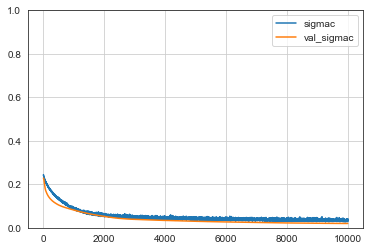

In [565]:
p = {
    'sigmac': model_history.history['mae'],
    'val_sigmac': model_history.history['val_mae'],
}
pd.DataFrame(p).plot()
figsize = (15,10)
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [566]:
model.evaluate(X_test_scaled, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 4.8880e-04 - mae: 0.0166


[0.0004888033727183938, 0.01660737209022045]

In [567]:
prediction = model.predict(X_test_scaled)
print(prediction)

[[0.2875026 ]
 [0.67127824]
 [0.51638967]
 [0.39708203]
 [0.7118741 ]
 [0.87221307]
 [0.31580043]
 [0.05884093]
 [0.8385905 ]
 [0.93939507]
 [0.39753115]
 [0.08349666]
 [0.8780401 ]
 [0.92859703]
 [0.8801073 ]
 [0.9065833 ]
 [0.89853746]
 [0.7035043 ]
 [0.22387192]
 [0.90758455]
 [0.9026934 ]
 [0.60047555]
 [0.3764556 ]
 [0.43779513]
 [0.5523625 ]
 [0.01551527]
 [0.0573985 ]
 [0.07832402]
 [0.63090646]
 [0.35539228]
 [0.5600892 ]
 [0.56098026]
 [0.34659553]
 [0.7431568 ]
 [0.8589424 ]
 [0.1672579 ]
 [0.7287375 ]
 [0.91744316]
 [0.10763979]
 [0.48921257]
 [0.6571933 ]
 [0.9062402 ]
 [0.7271875 ]
 [0.06052932]
 [0.22236899]
 [0.92061996]
 [0.33445343]
 [0.70905143]]


In [568]:
y_test

,sigmac
461,0.291667
400,0.675000
223,0.516667
380,0.408333
225,0.708333
393,0.883333
81,0.325000
66,0.066667
224,0.800000
451,0.983333


In [569]:
model.save("cc_training_4_5.h5")

In [570]:
del model

In [583]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model("cc_training_4_5.h5")

exp = pd.read_csv('exp_ZnOLiAldrich_1000_1.csv', sep=',', engine='python')
X_exp = exp.drop(['fname','deltaX','mX','deltaY','mY'], 1)
X_exp_scaled = scaler.transform(X_exp)

prediction = model.predict(X_exp_scaled)
print(prediction);

[[0.02092677]
 [0.01747197]
 [0.0161092 ]
 [0.00700119]
 [0.01435766]
 [0.01600128]
 [0.02222654]
 [0.01483107]
 [0.01831579]
 [0.02699018]
 [0.014727  ]
 [0.01007879]
 [0.01335803]
 [0.01280844]
 [0.01886493]
 [0.01463231]
 [0.01265752]
 [0.01814988]
 [0.01748949]
 [0.02089986]
 [0.01781368]
 [0.01265094]
 [0.01159343]
 [0.01402855]
 [0.01166156]
 [0.01661098]
 [0.02726859]
 [0.02381042]
 [0.01589349]
 [0.01706257]
 [0.01165462]
 [0.0149304 ]
 [0.01379871]
 [0.01613003]
 [0.01335981]
 [0.01646033]
 [0.02540743]
 [0.01703471]
 [0.01956642]
 [0.02003404]
 [0.01886183]
 [0.02132148]
 [0.0121181 ]
 [0.014631  ]
 [0.01243359]
 [0.01275301]
 [0.02354497]
 [0.01383656]
 [0.01502645]
 [0.01432988]
 [0.02395394]
 [0.02221522]
 [0.01824099]
 [0.0110561 ]
 [0.01620626]
 [0.00747502]
 [0.01414904]
 [0.01663235]
 [0.01115462]
 [0.01400957]
 [0.01081637]
 [0.01663569]
 [0.01486444]
 [0.01190582]
 [0.01144841]
 [0.01477423]
 [0.01639909]
 [0.01857197]
 [0.0202882 ]
 [0.01879078]
 [0.01517951]
 [0.01

In [584]:
exp["sigmac"] = prediction

In [585]:
exp.to_csv('cc_training_4_5_1000_ZnOLiAldrich_exp_output.csv', encoding='utf-8', index=False)